<a href="https://colab.research.google.com/github/sagar9926/Visualisations-/blob/master/PADHAI_Data_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Tabulation

In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7fea0399c358>)

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
covid_data

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
517  {'an': '44', 'ap': '8454', 'ar': '96', 'as': '...
518  {'an': '1', 'ap': '72', 'ar': '0', 'as': '8', ...
519  {'an': '37', 'ap': '10199', 'ar': '214', 'as':...
520  {'an': '65', 'ap': '9499', 'ar': '92', 'as': '...
521  {'an': '1', 'ap': '75', 'ar': '1', 'as': '7', ...

[522 rows x 1 columns]

In [7]:
import json

In [8]:
with open ('data.json') as f:
  data = json.load(f)
data = data['states_daily']

In [9]:
covid_data = pd.json_normalize(data)
covid_data.head()

an ap ar as br ch ct       date dd dl  ... sk     status tg tn tr  tt un  up ut wb
0  0  1  0  0  0  0  0  14-Mar-20  0  7  ...  0  Confirmed  1  1  0  81  0  12  0  0
1  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0  Recovered  0  0  0   9  0   4  0  0
2  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0   Deceased  0  0  0   2  0   0  0  0
3  0  0  0  0  0  0  0  15-Mar-20  0  0  ...  0  Confirmed  2  0  0  27  0   1  0  0
4  0  0  0  0  0  0  0  15-Mar-20  0  1  ...  0  Recovered  1  0  0   4  0   0  0  0

[5 rows x 41 columns]

In [10]:
df = covid_data

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df = df[df.status == "Confirmed"]

In [13]:
df.drop("status",axis = 1, inplace  = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.set_index("date",inplace = True)

In [15]:
df.head()

an ap ar as br ch ct dd dl dn ga  ... py rj sk tg tn tr  tt un  up ut wb
date                                         ...                                   
2020-03-14  0  1  0  0  0  0  0  0  7  0  0  ...  0  3  0  1  1  0  81  0  12  0  0
2020-03-15  0  0  0  0  0  0  0  0  0  0  0  ...  0  1  0  2  0  0  27  0   1  0  0
2020-03-16  0  0  0  0  0  0  0  0  0  0  0  ...  1  0  0  1  0  0  15  0   0  1  0
2020-03-17  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  11  0   2  0  1
2020-03-18  0  0  0  0  0  0  0  0  2  0  0  ...  0  3  0  8  1  0  37  0   2  1  0

[5 rows x 39 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2020-03-14 to 2020-09-03
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      174 non-null    object
 1   ap      174 non-null    object
 2   ar      174 non-null    object
 3   as      174 non-null    object
 4   br      174 non-null    object
 5   ch      174 non-null    object
 6   ct      174 non-null    object
 7   dd      174 non-null    object
 8   dl      174 non-null    object
 9   dn      174 non-null    object
 10  ga      174 non-null    object
 11  gj      174 non-null    object
 12  hp      174 non-null    object
 13  hr      174 non-null    object
 14  jh      174 non-null    object
 15  jk      174 non-null    object
 16  ka      174 non-null    object
 17  kl      174 non-null    object
 18  la      174 non-null    object
 19  ld      174 non-null    object
 20  mh      174 non-null    object
 21  ml      174 non-null    object
 22  mn     

In [17]:
df = df.apply(pd.to_numeric)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2020-03-14 to 2020-09-03
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      174 non-null    int64
 1   ap      174 non-null    int64
 2   ar      174 non-null    int64
 3   as      174 non-null    int64
 4   br      174 non-null    int64
 5   ch      174 non-null    int64
 6   ct      174 non-null    int64
 7   dd      174 non-null    int64
 8   dl      174 non-null    int64
 9   dn      174 non-null    int64
 10  ga      174 non-null    int64
 11  gj      174 non-null    int64
 12  hp      174 non-null    int64
 13  hr      174 non-null    int64
 14  jh      174 non-null    int64
 15  jk      174 non-null    int64
 16  ka      174 non-null    int64
 17  kl      174 non-null    int64
 18  la      174 non-null    int64
 19  ld      174 non-null    int64
 20  mh      174 non-null    int64
 21  ml      174 non-null    int64
 22  mn      174 non-null    int64
 

In [19]:
df.tail(7)

an     ap   ar    as    br   ch  ...   tr     tt  un    up   ut    wb
date                                         ...                                 
2020-08-28  32  10526  112  2560  1998  160  ...  509  76657   0  5405  588  2982
2020-08-29  31  10548  132  2427  2087  261  ...  443  78479   0  5633  706  3012
2020-08-30  23  10603  157  1980  2078  170  ...  447  79461   0  6175  664  3019
2020-08-31  28  10004   78  3266  1324  191  ...  321  68766   0  4782  592  2993
2020-09-01  28  10368  100  2684  1928  204  ...  509  78168   0  5343  571  2943
2020-09-02  26  10392  148  3555  1969  239  ...  566  82860   0  5682  836  2976
2020-09-03  37  10199  214  3054  1922  276  ...  590  82172   0  5662  946  2984

[7 rows x 39 columns]

## Styling Tabulation

In [20]:
df = df.tail(7)

In [21]:
df.style

In [22]:
def color_red_negetive(x):
  color = 'red' if x < 0 else 'black'
  return 'color:' + color 

In [23]:
df.style.applymap(color_red_negetive)

In [24]:
df.drop("un",inplace = True,axis = 1)

In [25]:
df.style.applymap(color_red_negetive)

In [26]:
df.style.highlight_max(color = "red")

In [27]:
df.drop(["dd","ld"],axis = 1, inplace = True)

In [28]:
df.style.highlight_max(color = "red").highlight_min(color = "green")

In [29]:
df.drop("tt",inplace = True,axis = 1)

In [30]:
def bold_max_value(x):
  is_max = (x == x.max())
  return['font-weight: bold' if y else '' for y in is_max]

In [31]:
df.style.apply(bold_max_value)

In [32]:
df.style.apply(bold_max_value).highlight_min(color = "green")

In [33]:
df.style.apply(bold_max_value).highlight_max(color = "red",axis = 1)

In [34]:
df.style.background_gradient(cmap = "Reds")

In [35]:
df.style.background_gradient(cmap = "Reds", axis = 1)

In [36]:
df.style.bar()

In [37]:
df.style.bar(subset = ["mh","tn","dl"])

In [38]:
df[["mh","tn","dl"]].style.bar()

In [39]:
df[["mh","tn","dl"]].style.bar(subset = ["mh"] , color = "red").bar(subset = ["tn"] , color = "green").bar(subset = ["dl"] , color = "yellow")

# Distribution of data 

## Distribution of Continuous Variable 


### Histogram

In [40]:
x = np.random.normal(size  = 1000)
sns.set(color_codes = True)

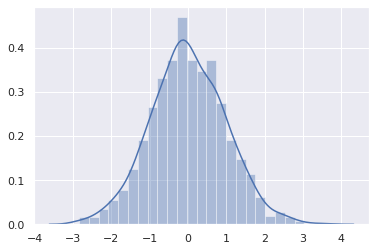

In [41]:
sns.distplot(x);

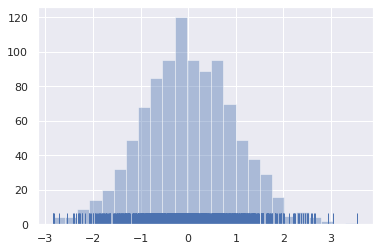

In [42]:
sns.distplot(x , kde = False , rug = True);

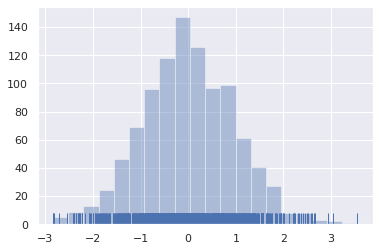

In [43]:
sns.distplot(x , kde = False , rug = True,bins = 20);

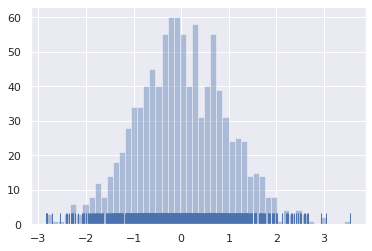

In [44]:
sns.distplot(x , kde = False , rug = True,bins = 50);

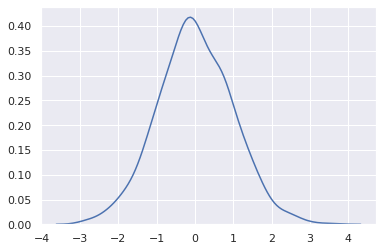

In [45]:
sns.kdeplot(x);

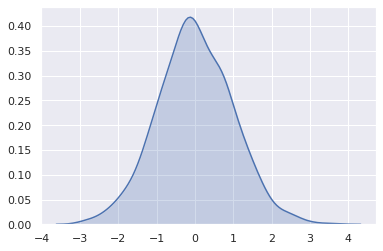

In [46]:
sns.kdeplot(x,shade = True);

In [47]:
y = np.random.uniform(size = 1000)

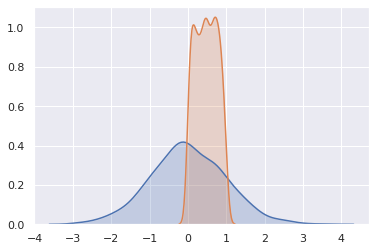

In [48]:
sns.kdeplot(x,shade = True);
sns.kdeplot(y,shade = True);

In [49]:
d = sns.load_dataset('diamonds')

In [50]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


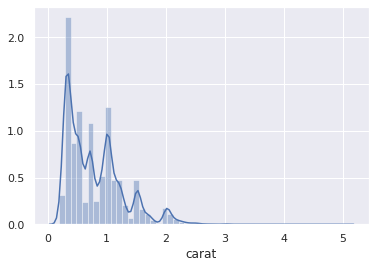

In [52]:
sns.distplot(d.carat);

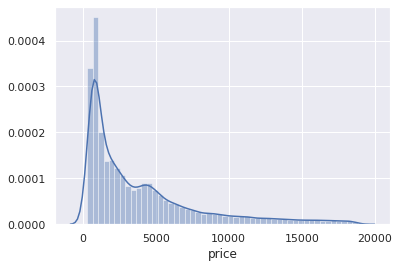

In [53]:
sns.distplot(d.price);

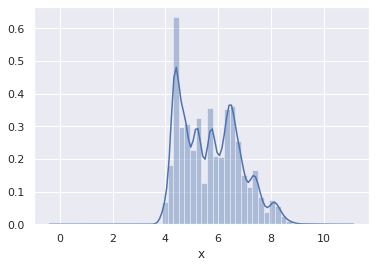

In [54]:
sns.distplot(d.x);

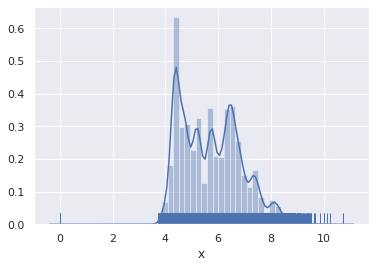

In [55]:
sns.distplot(d.x, rug = True);

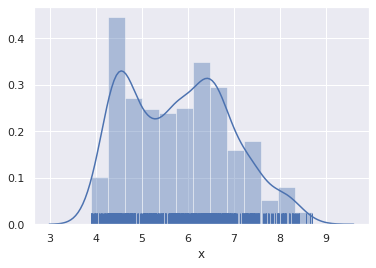

In [56]:
sns.distplot(d.sample(1000).x, rug = True);

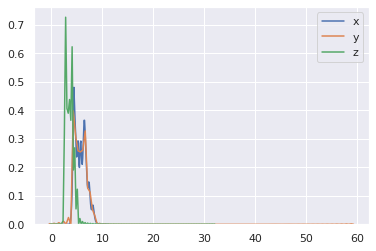

In [57]:
sns.kdeplot(d.x);
sns.kdeplot(d.y);
sns.kdeplot(d.z);

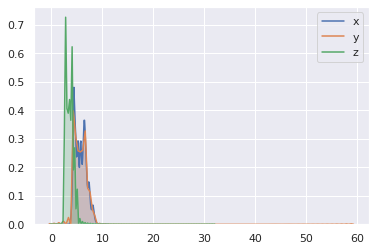

In [58]:
sns.kdeplot(d.x, shade = True);
sns.kdeplot(d.y, shade = True);
sns.kdeplot(d.z, shade = True);

### Box Plot

In [59]:
x = np.random.normal(size = 1000)

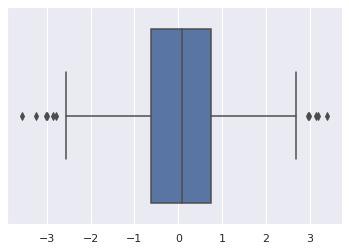

In [60]:
sns.boxplot(x)

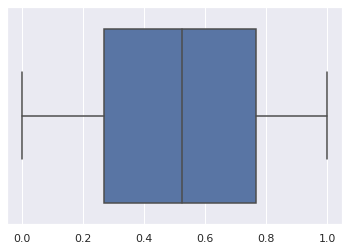

In [61]:
x = np.random.uniform(size = 1000)
sns.boxplot(x);

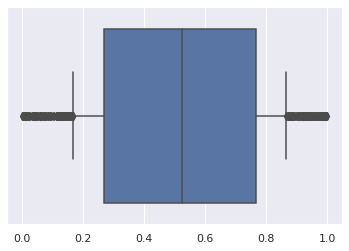

In [62]:
sns.boxplot(x,whis = 0.2);

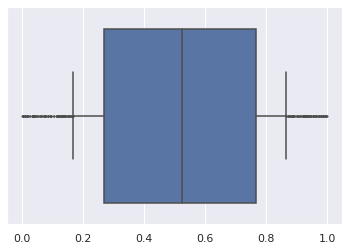

In [63]:
sns.boxplot(x,whis = 0.2,fliersize = 1);

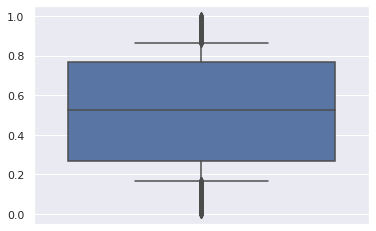

In [64]:
sns.boxplot(x,whis = 0.2,orient = "v");

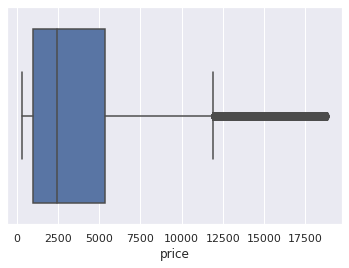

In [65]:
sns.boxplot(d.price);

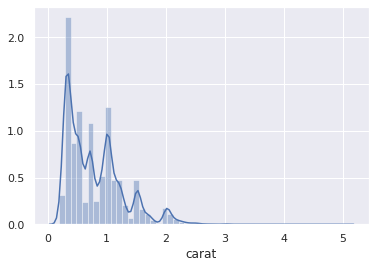

In [66]:
sns.distplot(d.carat)

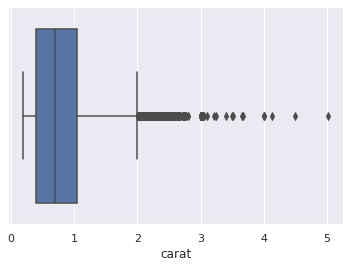

In [67]:
sns.boxplot(d.carat)

### Boxen plot

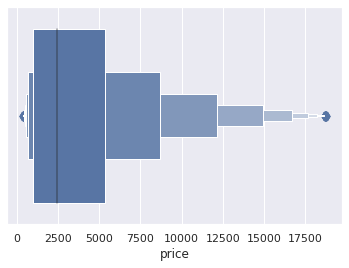

In [68]:
sns.boxenplot(d.price);

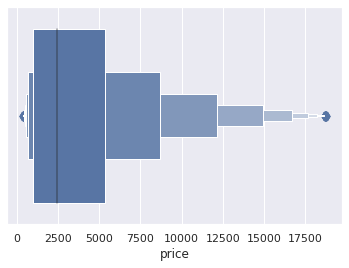

In [69]:
sns.boxenplot(d.price);

## Distribution of categorical variables

### Bar plots

In [71]:
c  = d.groupby('cut')['cut'].count()

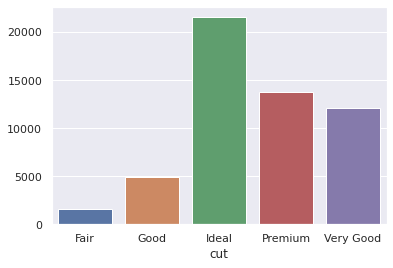

In [72]:
sns.barplot(x = c.index,y  = c.values);

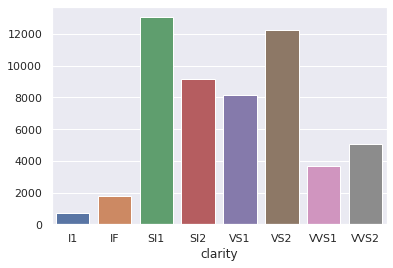

In [73]:
c  = d.groupby('clarity')['clarity'].count()
sns.barplot(x = c.index,y  = c.values);


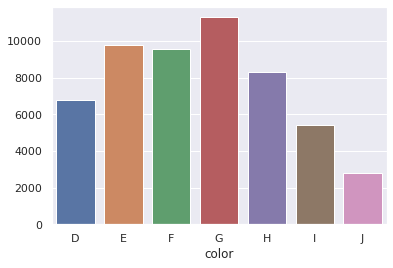

In [74]:
c  = d.groupby('color')['color'].count()
sns.barplot(x = c.index,y  = c.values);


## Joint distribution of two variables

### Jointplot

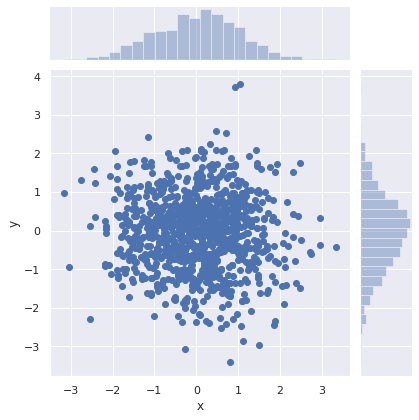

In [75]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

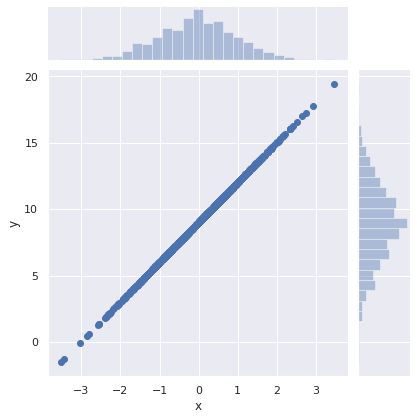

In [76]:
x = np.random.normal(size = 1000)
y = 3*x + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

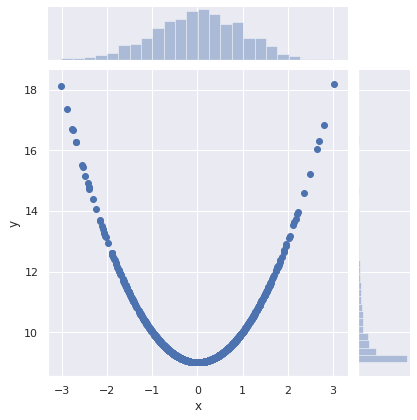

In [77]:
x = np.random.normal(size = 1000)
y = x**2 + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

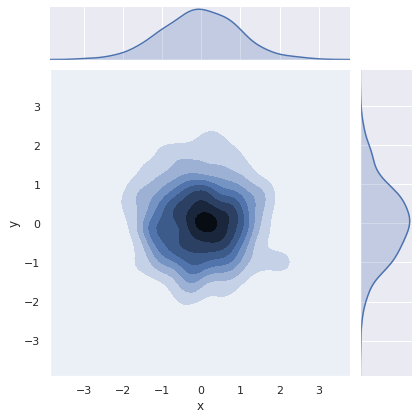

In [78]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

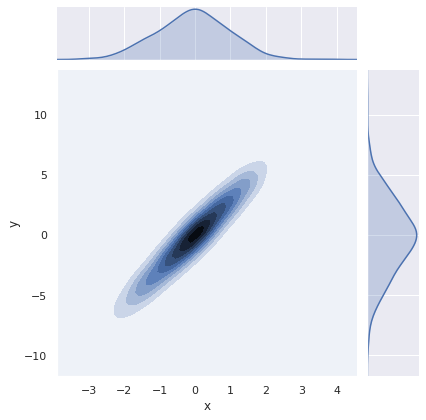

In [79]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)/5
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

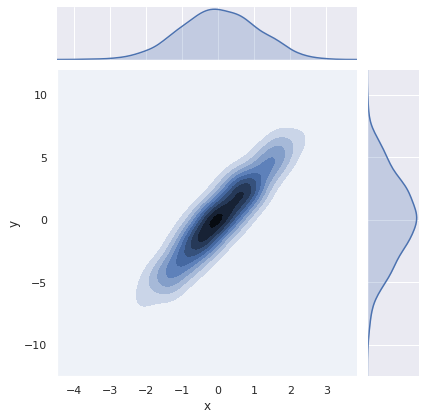

In [80]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

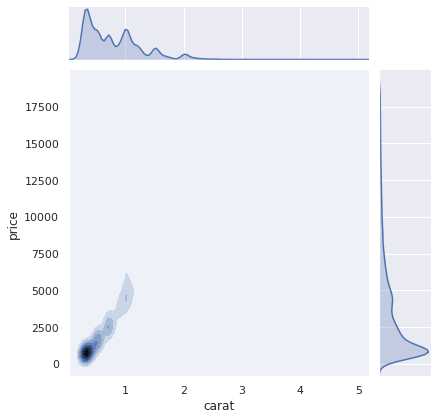

In [81]:
sns.jointplot("carat","price",data = d, kind = 'kde')

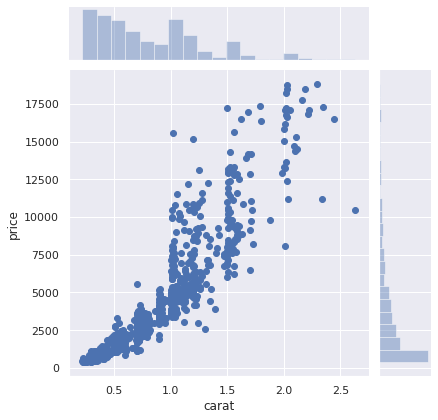

In [82]:
sns.jointplot("carat","price",data = d.sample(1000))

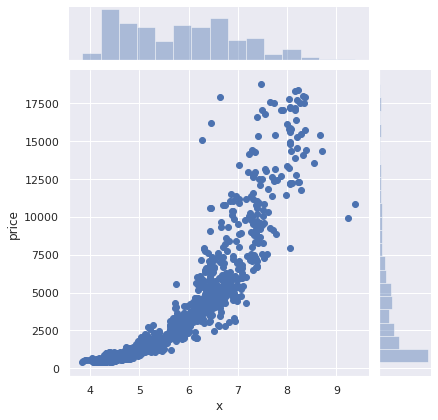

In [83]:
sns.jointplot("x","price",data = d.sample(1000))

### Swarm plot

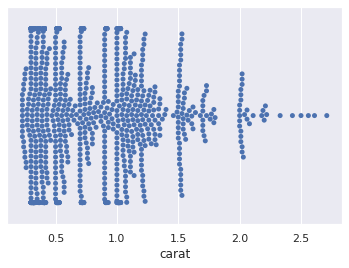

In [84]:
sns.swarmplot(d.sample(1000).carat)

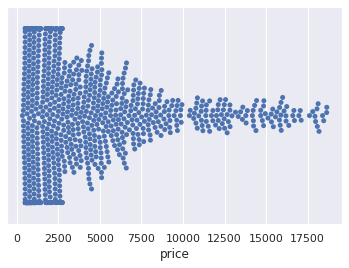

In [85]:
sns.swarmplot(d.sample(1000).price);

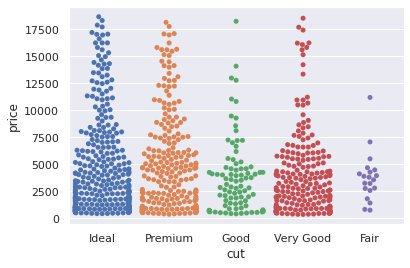

In [86]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000))

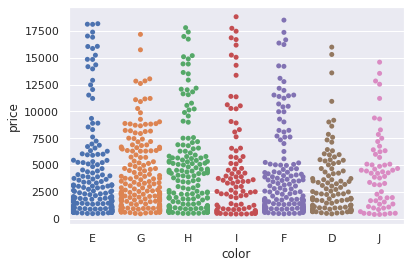

In [87]:
sns.swarmplot(x = 'color', y = 'price', data = d.sample(1000))

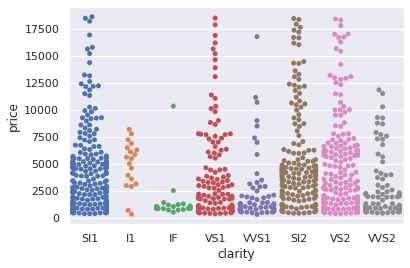

In [88]:
sns.swarmplot(x = 'clarity', y = 'price', data = d.sample(1000))

In [89]:
p = sns.load_dataset('penguins')

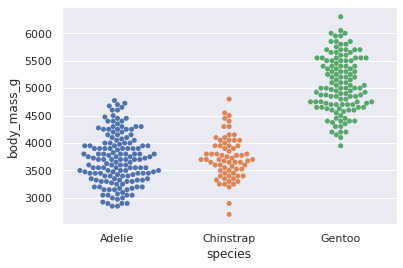

In [90]:
sns.swarmplot(x = 'species',y = "body_mass_g", data = p)

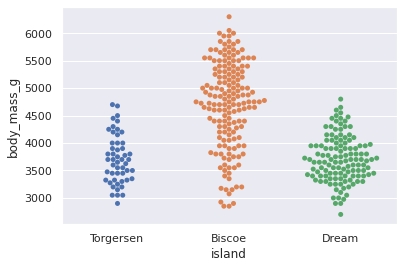

In [91]:
sns.swarmplot(x = 'island',y = "body_mass_g", data = p)

### Violin plot

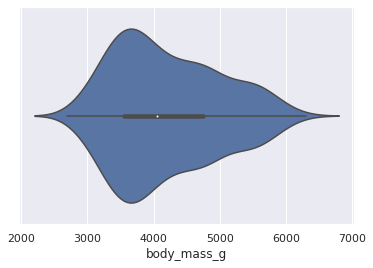

In [92]:
sns.violinplot(x = 'body_mass_g', data = p)

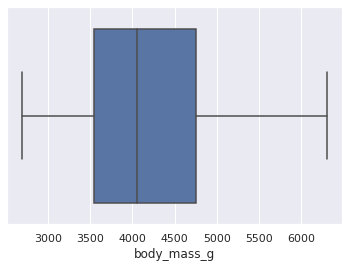

In [93]:
sns.boxplot(x = 'body_mass_g', data = p)

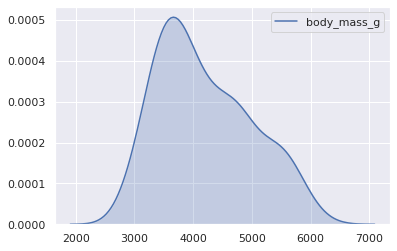

In [94]:
sns.kdeplot(p.body_mass_g , shade = True)

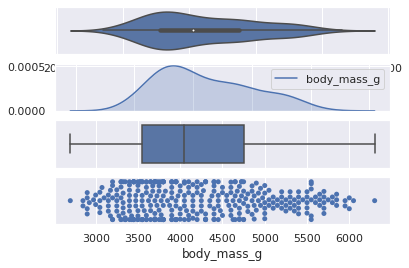

In [95]:
fig , axs  = plt.subplots(nrows = 4)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

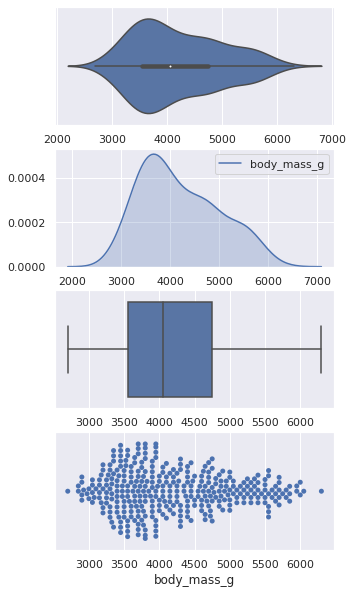

In [96]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(5,10)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

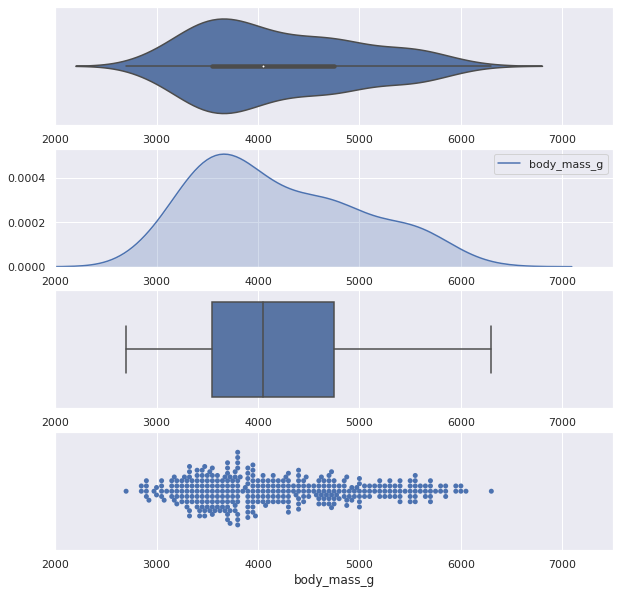

In [97]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(10,10)
p1 = sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
p1.set(xlim = (2000,7500));

p2 = sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
p2.set(xlim = (2000,7500));

p3 = sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
p3.set(xlim = (2000,7500));

p4 = sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);
p4.set(xlim = (2000,7500));


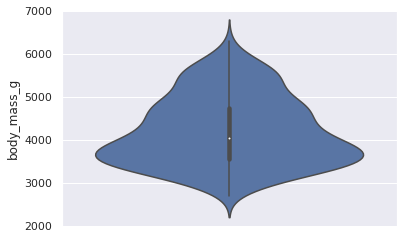

In [98]:
sns.violinplot(x = 'body_mass_g', data = p, orient = 'v');

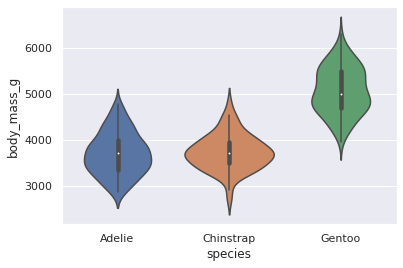

In [99]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = p);

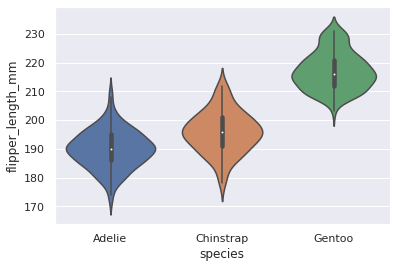

In [100]:
sns.violinplot(x = 'species', y = 'flipper_length_mm', data = p);

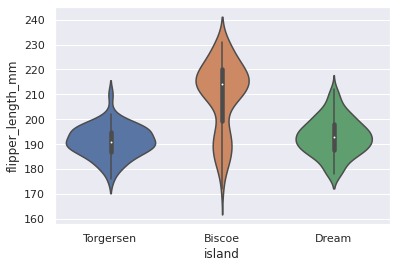

In [101]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

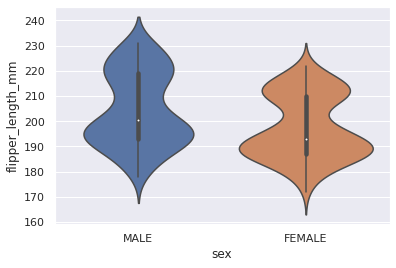

In [102]:
sns.violinplot(x = 'sex', y = 'flipper_length_mm', data = p);

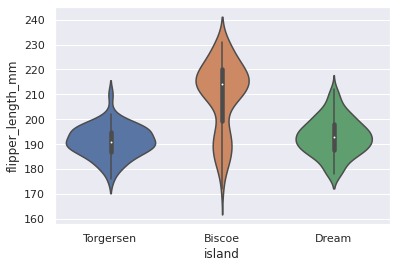

In [103]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

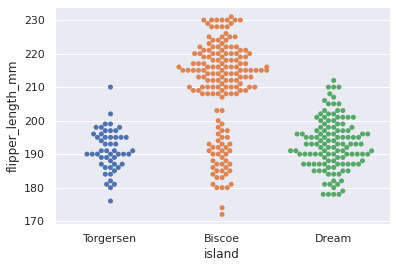

In [104]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p);

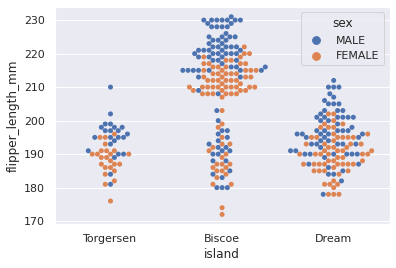

In [105]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'sex');

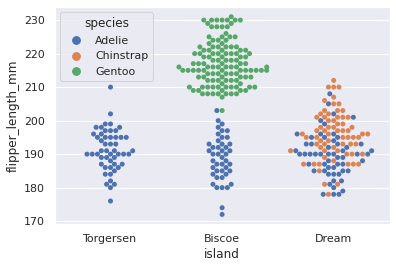

In [106]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'species');

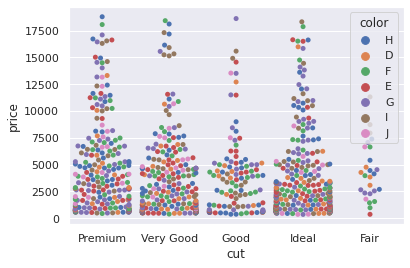

In [107]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000), hue = 'color');

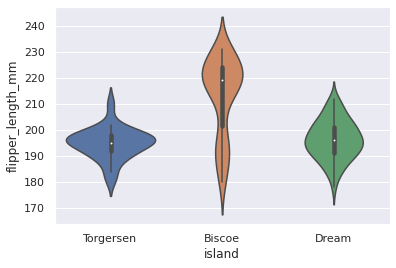

In [108]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "MALE"]);

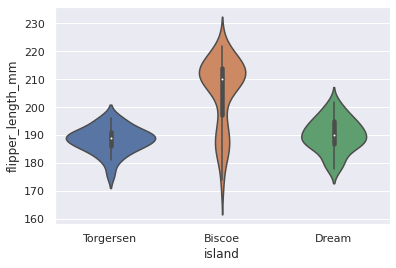

In [109]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "FEMALE"]);

### Paired violin plot

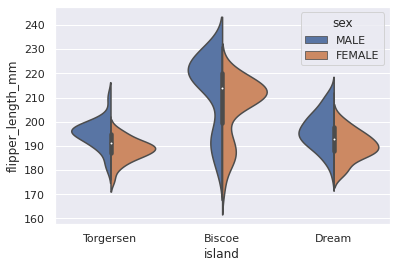

In [110]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",split = True);

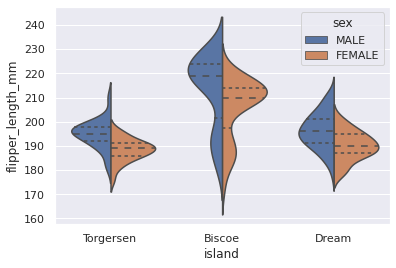

In [111]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",
               split = True , inner = 'quartile');

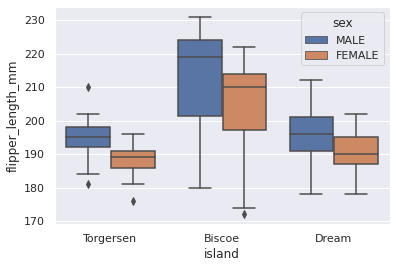

In [114]:
sns.boxplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex");

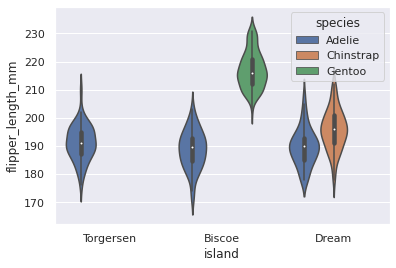

In [115]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "species");

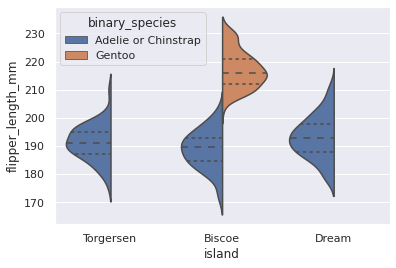

In [116]:
p['binary_species'] = p.species.apply(lambda x : 'Gentoo' if x == 'Gentoo' else 'Adelie or Chinstrap')

sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "binary_species",
               split = True , inner = 'quartile');

### Faceted Plot

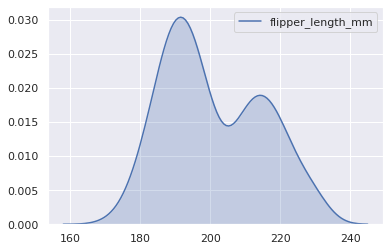

In [117]:
sns.kdeplot(p.flipper_length_mm,shade = True)

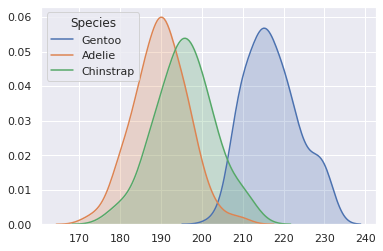

In [118]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True)
plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


In [119]:
p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

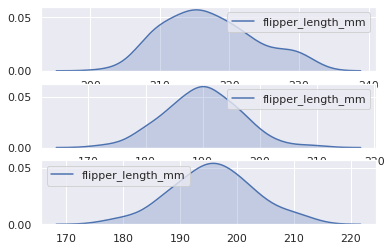

In [120]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


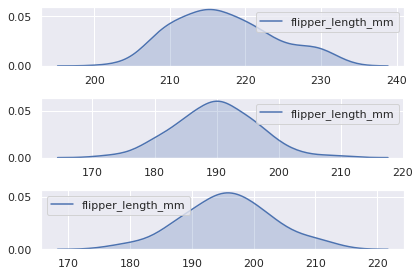

In [121]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
plt.tight_layout()
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


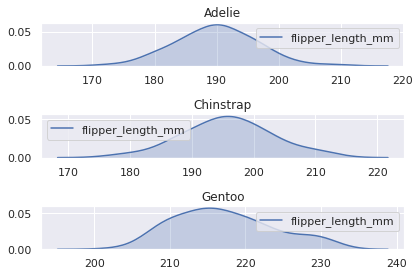

In [122]:
column_name = "species"
nrows = len(p[column_name].unique())
fig , axs = plt.subplots(nrows = nrows)
i = 0

for c_v in p[column_name].unique():
  pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm,shade = True , ax  = axs[i])
  pl.set_title(c_v)
  i = i + 1

plt.tight_layout()

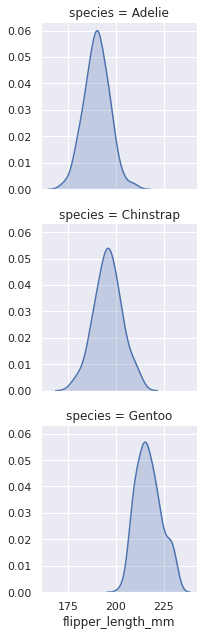

In [123]:
g = sns.FacetGrid(p , row = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

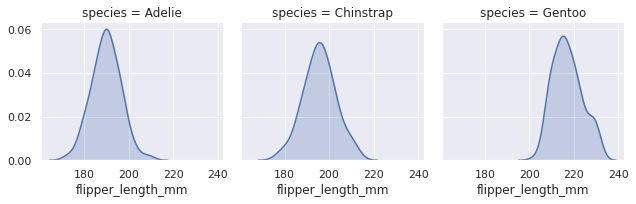

In [124]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

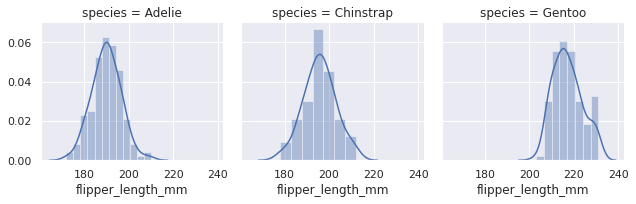

In [125]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.distplot,'flipper_length_mm');

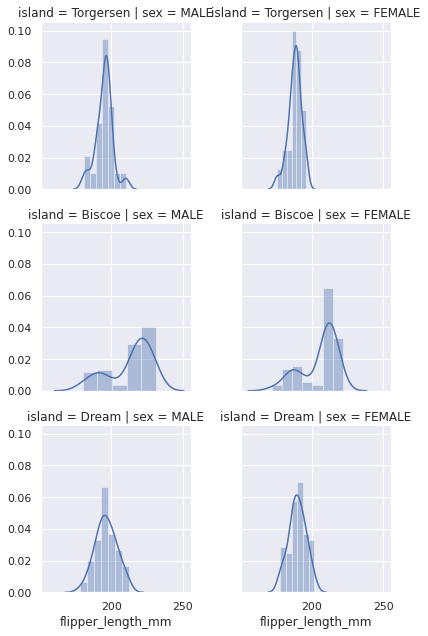

In [126]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.distplot,'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


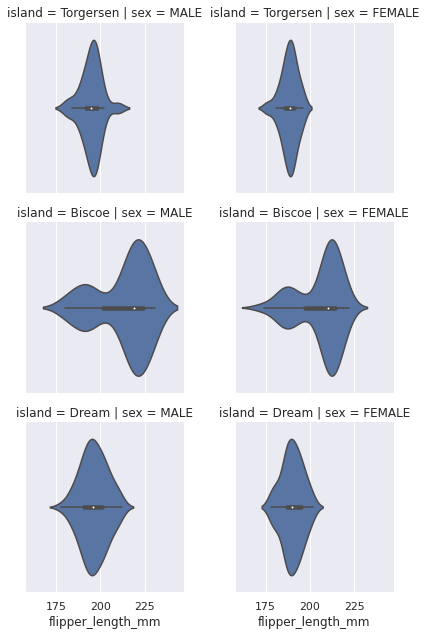

In [127]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.violinplot,'flipper_length_mm');

### Pair plot

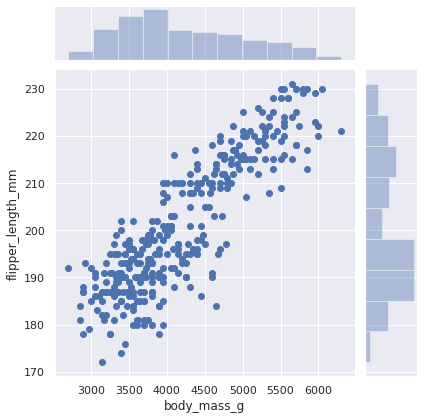

In [128]:
sns.jointplot(p.body_mass_g,p.flipper_length_mm);

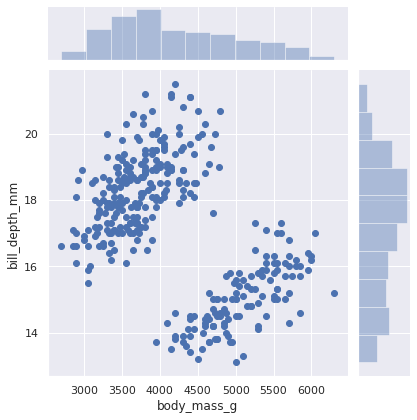

In [129]:
sns.jointplot(p.body_mass_g,p.bill_depth_mm);

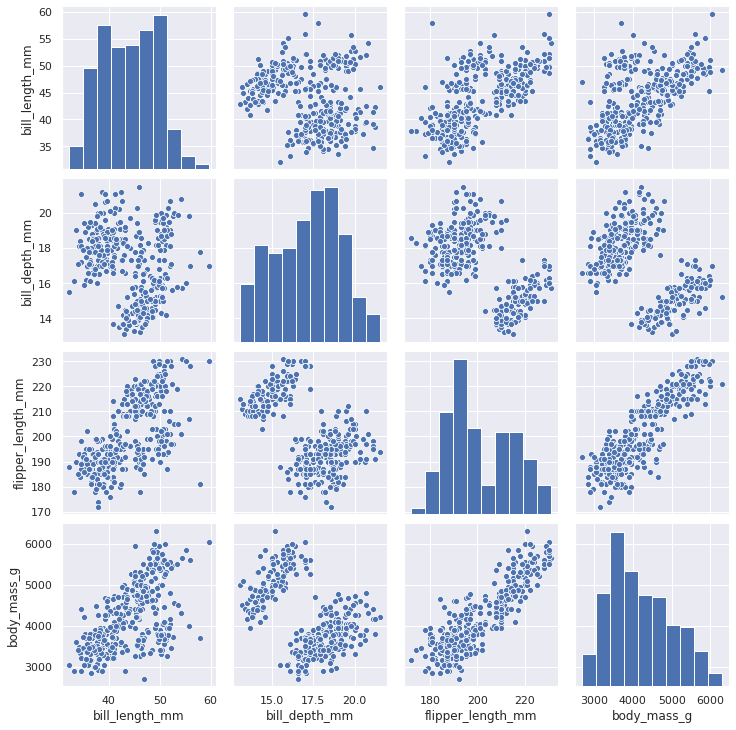

In [130]:
sns.pairplot(p);

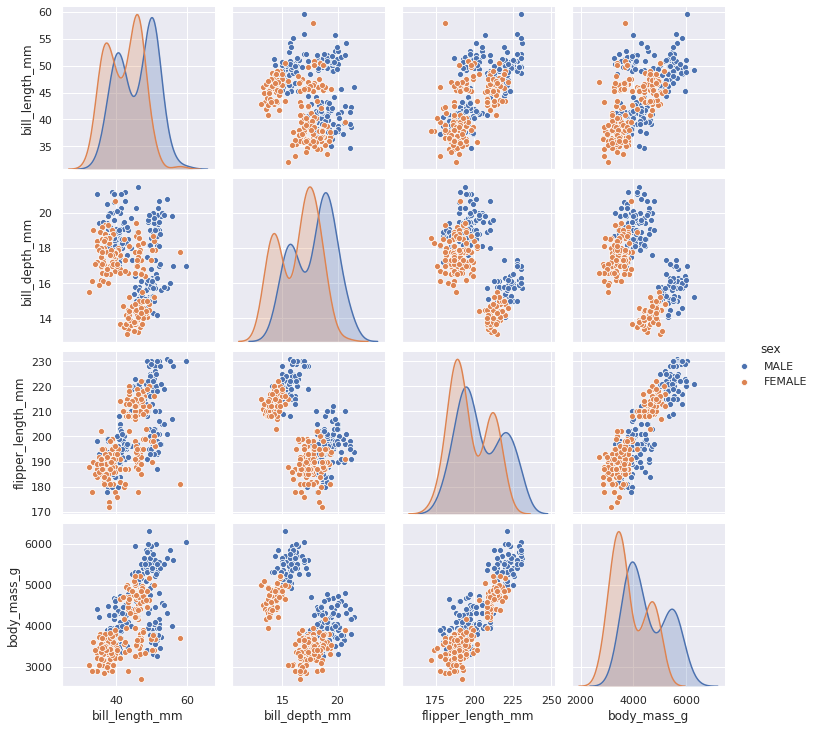

In [131]:
sns.pairplot(p , hue = 'sex');

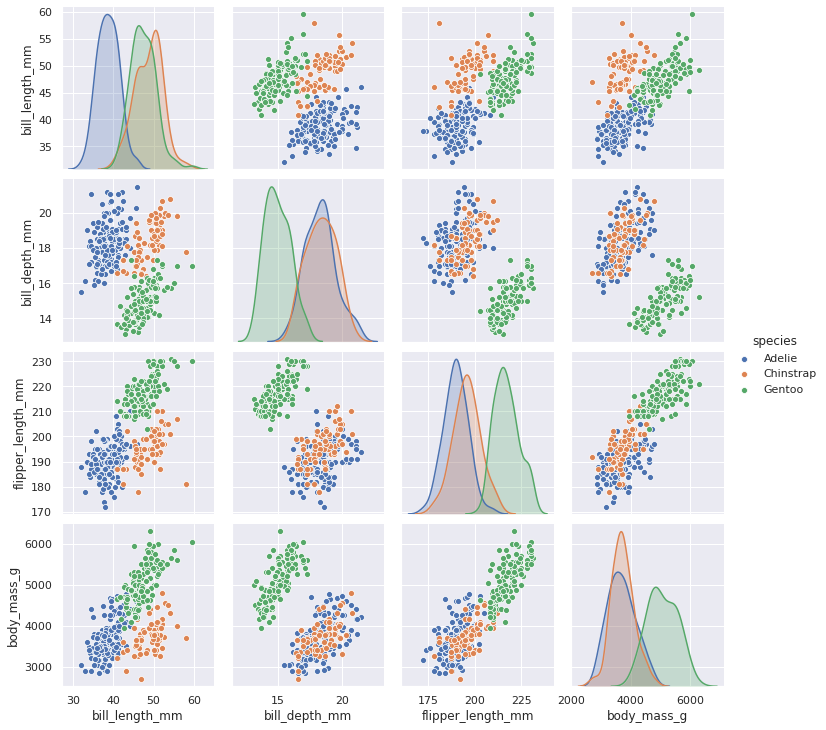

In [132]:
sns.pairplot(p , hue = 'species');

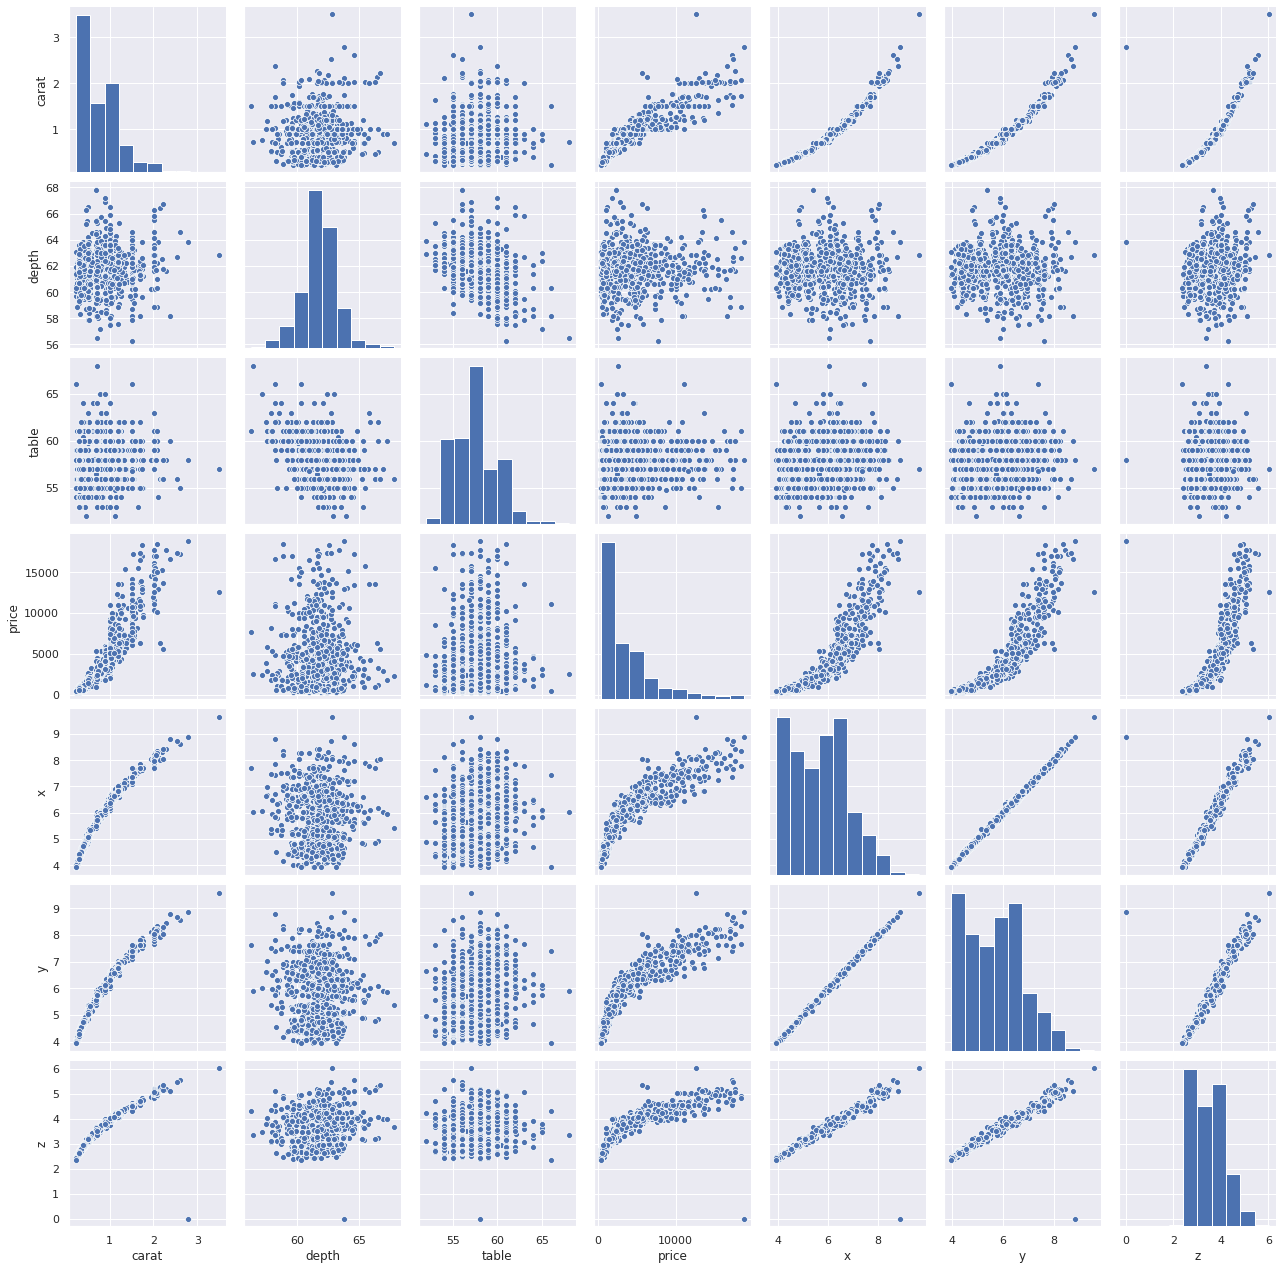

In [133]:
sns.pairplot(d.sample(1000))

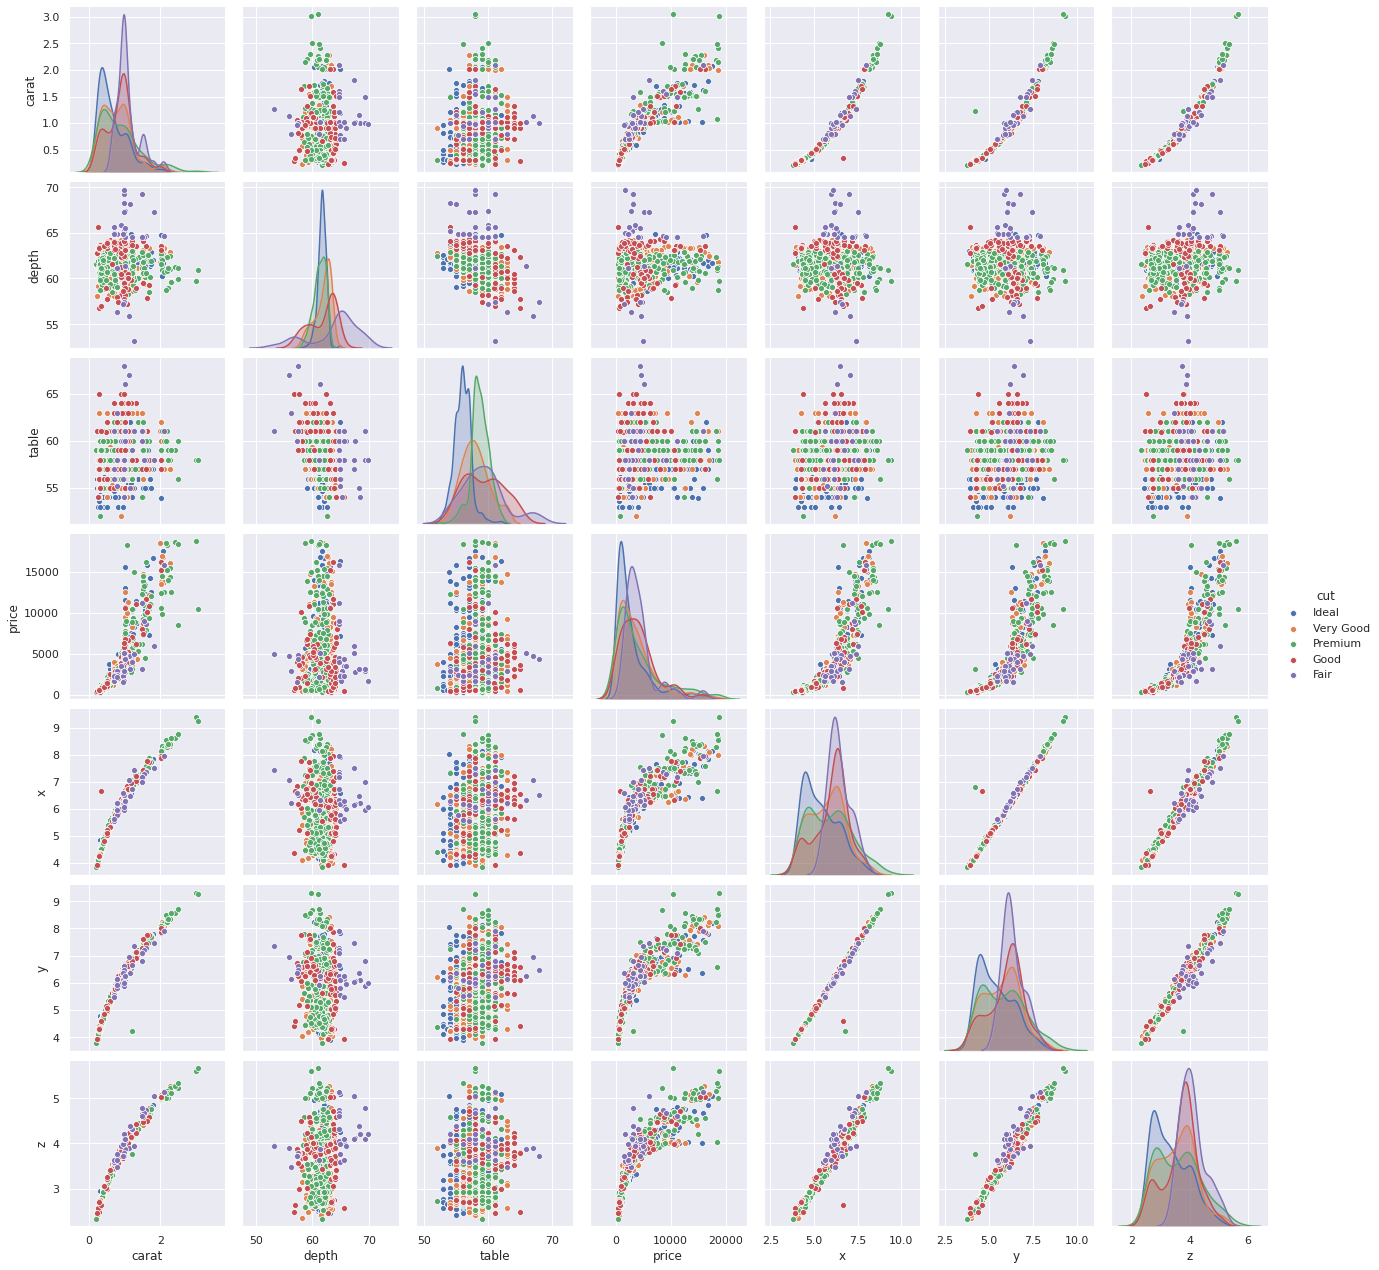

In [134]:
sns.pairplot(d.sample(1000), hue = 'cut')

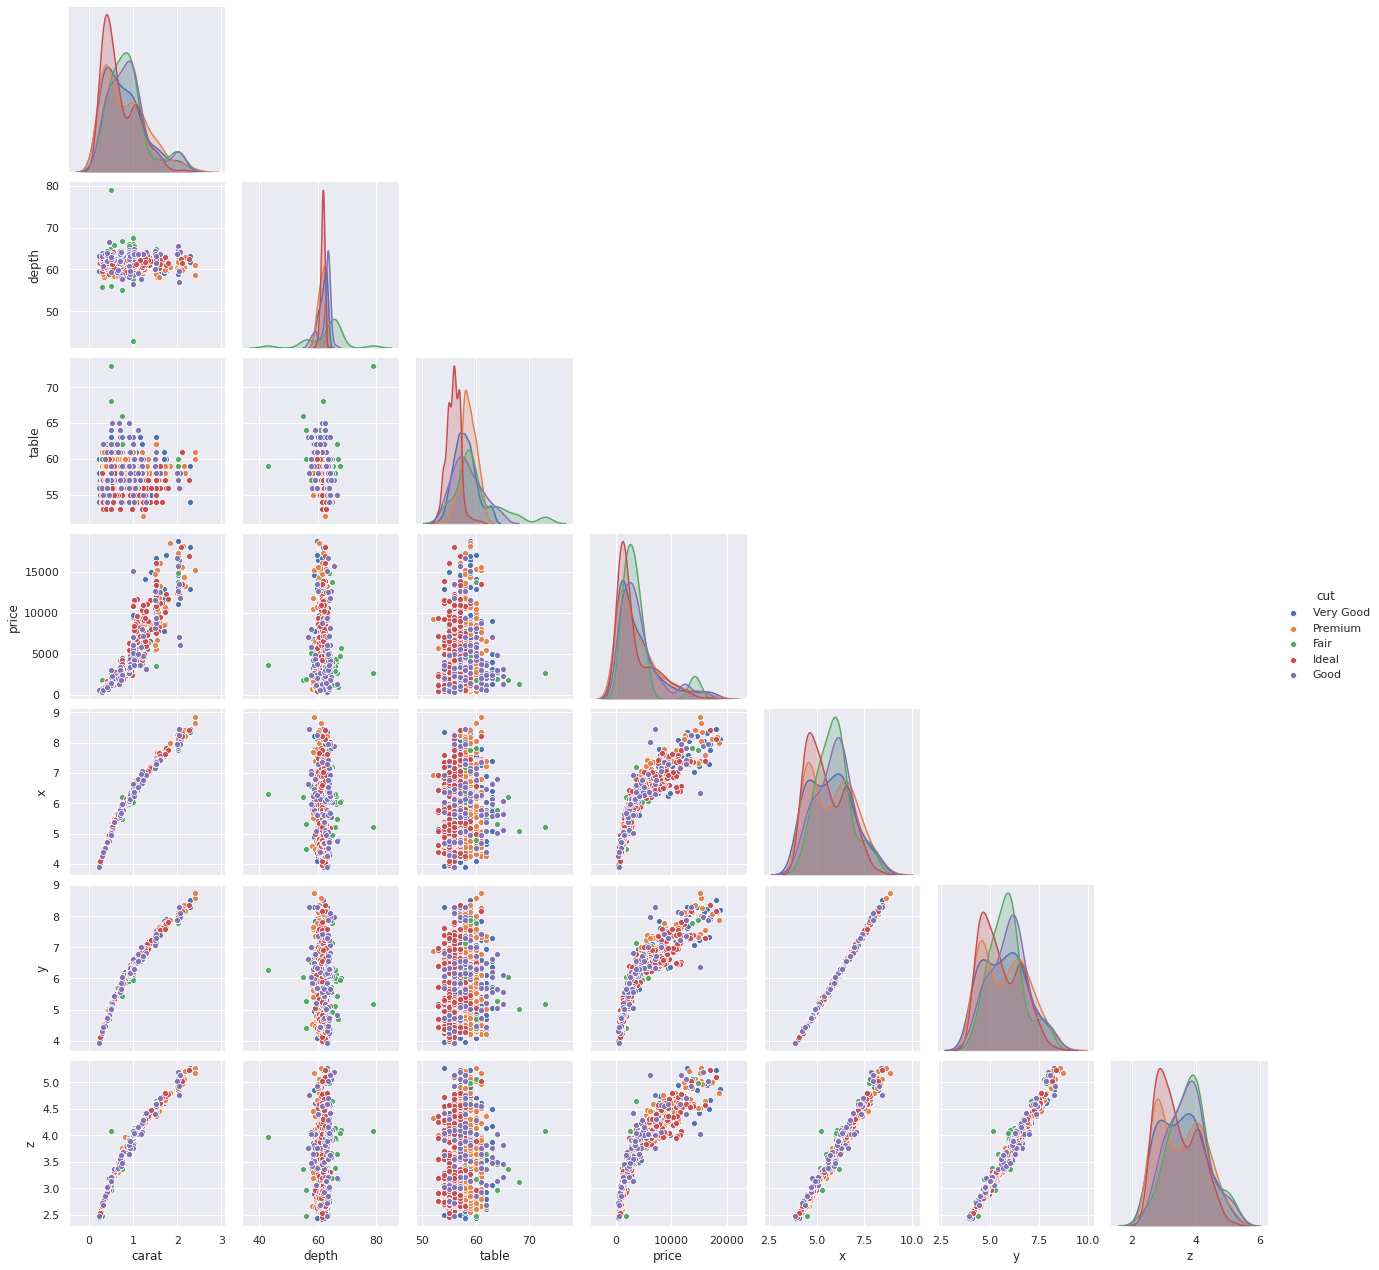

In [135]:
sns.pairplot(d.sample(1000), hue = 'cut',corner = True)

# Plotting the composition of data

## Static Composition

### Pie Chart

In [136]:
p = sns.load_dataset("penguins")

In [137]:
p.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

In [138]:
c = p.groupby('species')['species'].count()

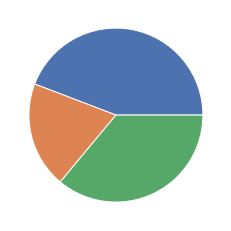

In [139]:
plt.pie(c)
plt.show()

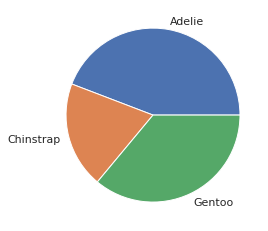

In [140]:
plt.pie(c , labels = c.index)
plt.show()

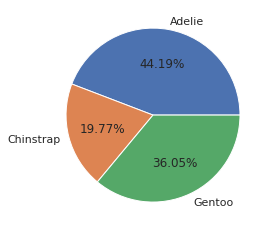

In [141]:
plt.pie(c , labels = c.index , autopct="%.2f%%")
plt.show()

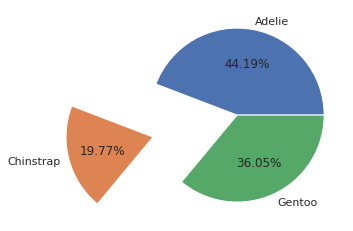

In [142]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0])
plt.show()

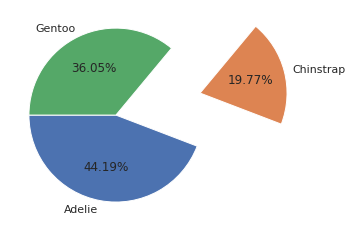

In [143]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0] , startangle = 180)
plt.show()

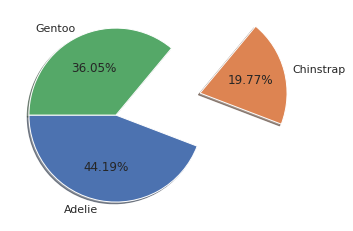

In [144]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0] , startangle = 180 , shadow = True)
plt.show()

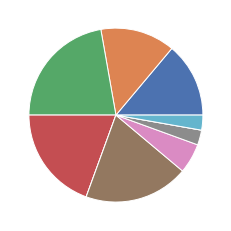

In [145]:
plt.pie(np.random.randint(0,10,10 ))
plt.show()

### Donut Chart

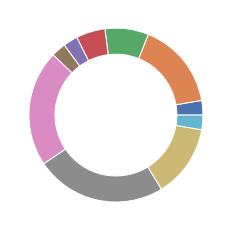

In [146]:
plt.pie(np.random.randint(0,10,10) , wedgeprops= dict(width = 0.3))
plt.show()

In [147]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))
my_colours

array([[0.49803922, 0.78823529, 0.49803922, 1.        ],
       [0.74509804, 0.68235294, 0.83137255, 1.        ],
       [0.99215686, 0.75294118, 0.5254902 , 1.        ],
       [1.        , 1.        , 0.6       , 1.        ],
       [0.21960784, 0.42352941, 0.69019608, 1.        ],
       [0.94117647, 0.00784314, 0.49803922, 1.        ],
       [0.74901961, 0.35686275, 0.09019608, 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ]])

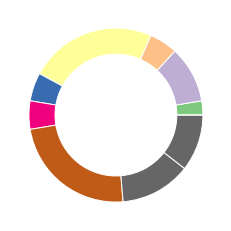

In [148]:
plt.pie(np.random.randint(0,10,10) ,
        wedgeprops= dict(width = 0.3),
        colors = my_colours)
plt.show()

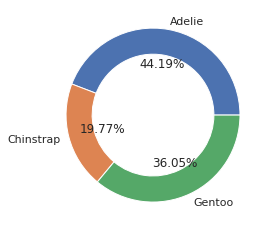

In [149]:
plt.pie(c , labels = c.index , wedgeprops= dict(width = 0.3) , autopct="%.2f%%")
plt.show()

In [150]:
c = pd.crosstab(p.species,p.island)

In [151]:
c = c.T

In [152]:
c

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

In [153]:
c.sum(axis = 1)

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

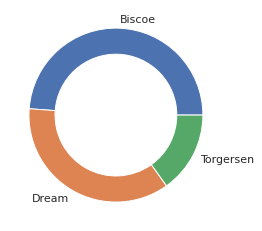

In [154]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3))
plt.show()

In [155]:
c.values.flatten()

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

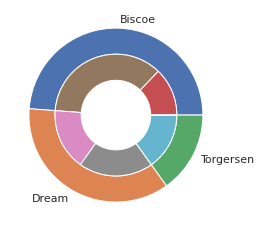

In [156]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3))
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 , wedgeprops = dict(width = 0.3))
plt.show()

In [157]:
cmap = plt.get_cmap('tab20c')
outer_colours = cmap(np.array([0,4,8]))
inner_colours = cmap(np.array([1,2,3,5,6,7,9,10,11]))

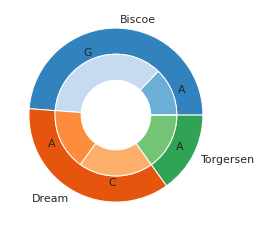

In [158]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()

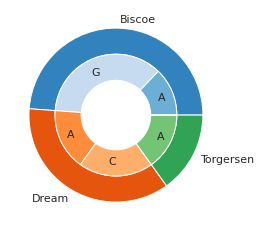

In [159]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        labeldistance = 0.75,
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()

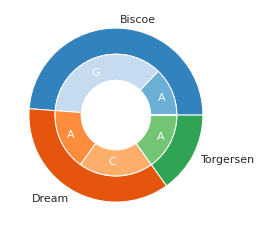

In [160]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        labeldistance = 0.75,textprops = dict(color = "w"),
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()

### Stacked Bar plot

In [161]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [162]:
df.head()

an ap ar as br ch ct       date dd dl  ... sk     status tg tn tr  tt un  up ut wb
0  0  1  0  0  0  0  0  14-Mar-20  0  7  ...  0  Confirmed  1  1  0  81  0  12  0  0
1  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0  Recovered  0  0  0   9  0   4  0  0
2  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0   Deceased  0  0  0   2  0   0  0  0
3  0  0  0  0  0  0  0  15-Mar-20  0  0  ...  0  Confirmed  2  0  0  27  0   1  0  0
4  0  0  0  0  0  0  0  15-Mar-20  0  1  ...  0  Recovered  1  0  0   4  0   0  0  0

[5 rows x 41 columns]

In [163]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [164]:
df_.head()

status  Confirmed  Recovered  Deceased
an             37         65         1
ap          10199       9499        75
ar            214         92         1
as           3054       1971         7
br           1922       1572         6

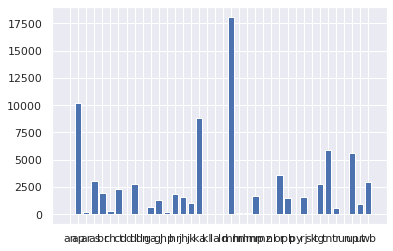

In [165]:
plt.bar(df_.index, df_.Confirmed);

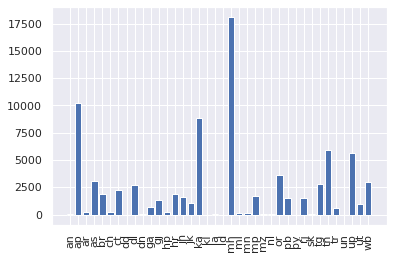

In [166]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

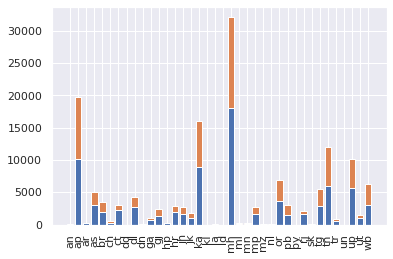

In [167]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

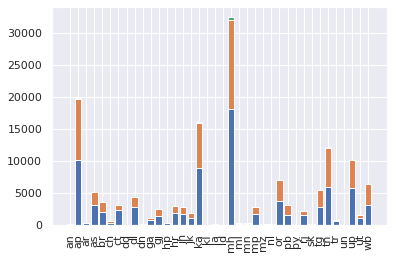

In [168]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

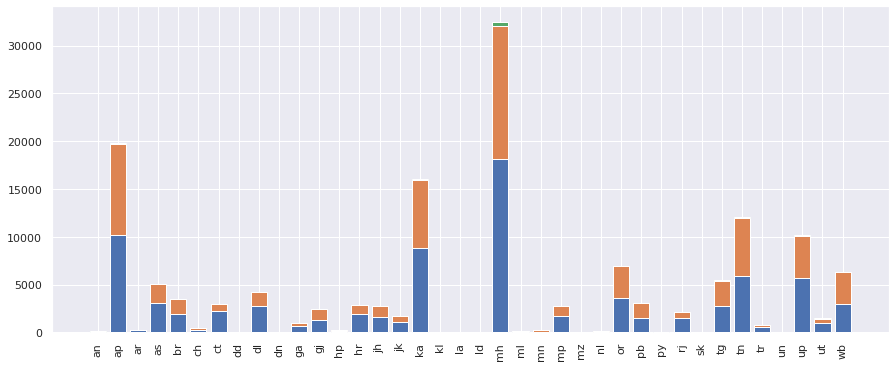

In [169]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

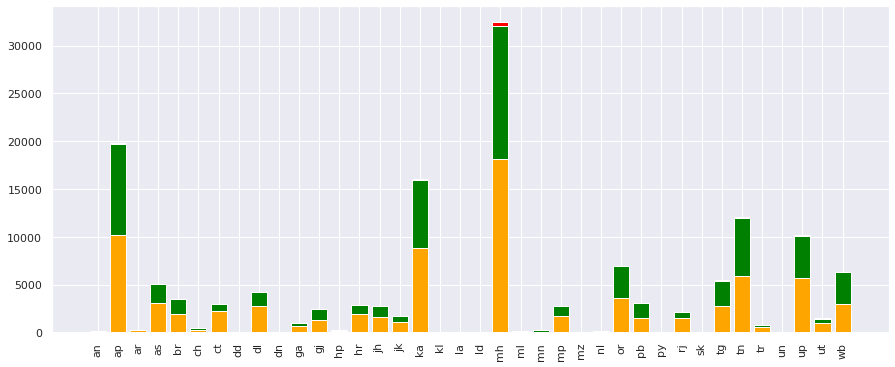

In [170]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

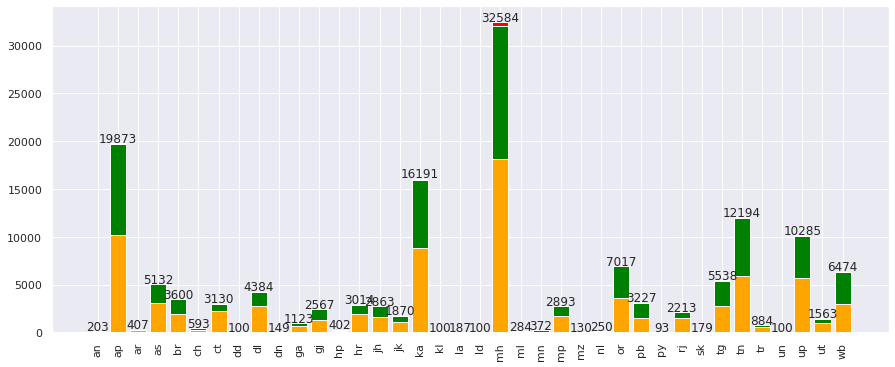

In [171]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

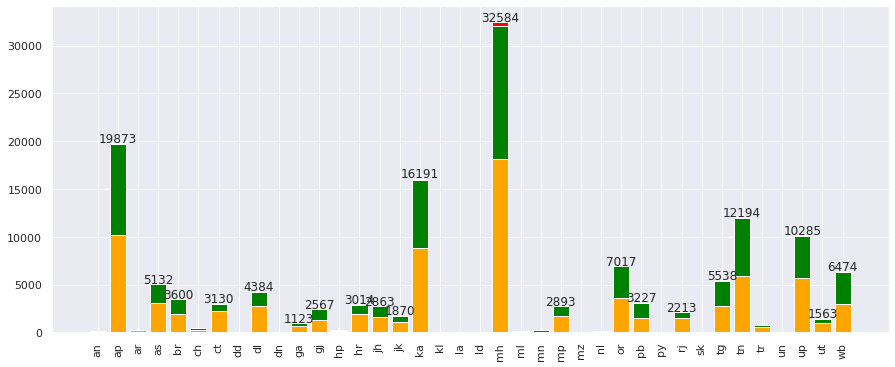

In [172]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

### Relative stacked bar plots

In [173]:
df_.head()

status  Confirmed  Recovered  Deceased
an             37         65         1
ap          10199       9499        75
ar            214         92         1
as           3054       1971         7
br           1922       1572         6

In [174]:
df_['Total'] = 0

In [175]:
df_['Total'] = df_.sum(axis = 1)

In [176]:
df_.head()

status  Confirmed  Recovered  Deceased  Total
an             37         65         1    103
ap          10199       9499        75  19773
ar            214         92         1    307
as           3054       1971         7   5032
br           1922       1572         6   3500

In [177]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']

In [178]:
df_.head()

status  Confirmed  Recovered  ...  RecoveredFraction  DeceasedFraction
an             37         65  ...           0.631068          0.009709
ap          10199       9499  ...           0.480403          0.003793
ar            214         92  ...           0.299674          0.003257
as           3054       1971  ...           0.391693          0.001391
br           1922       1572  ...           0.449143          0.001714

[5 rows x 7 columns]

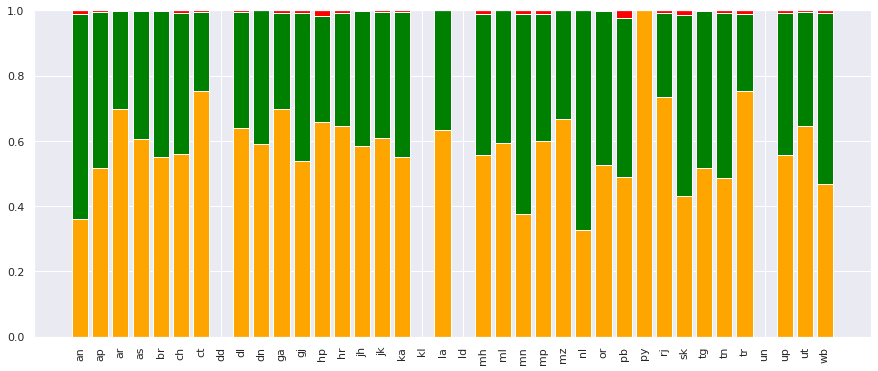

In [179]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

In [180]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

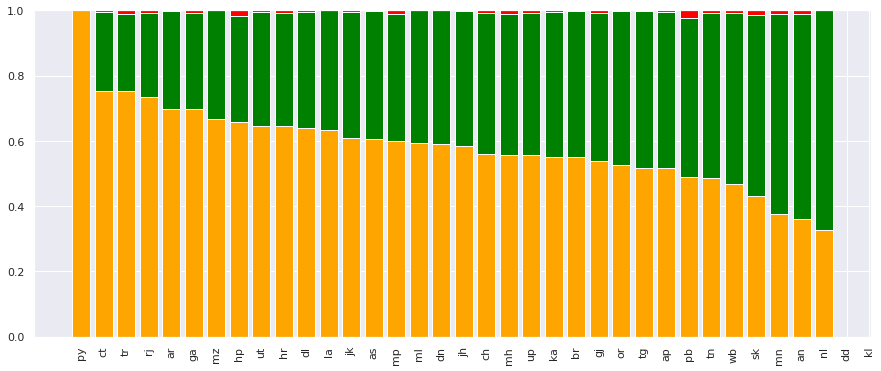

In [181]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

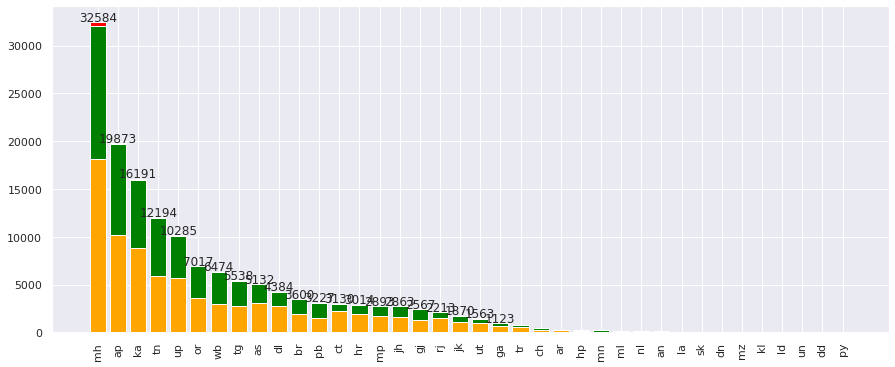

In [182]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

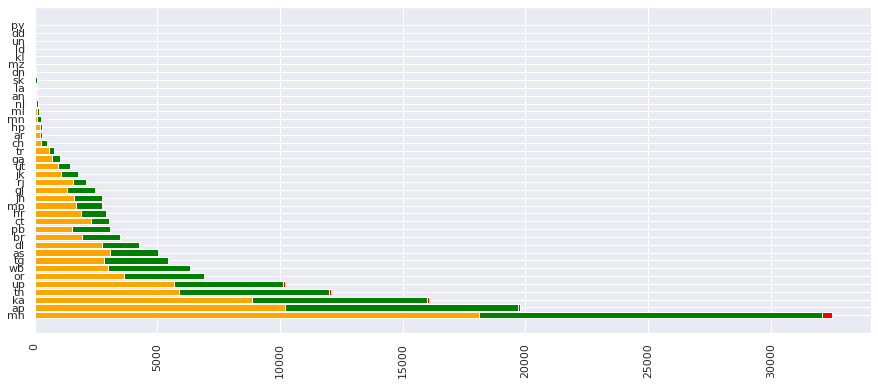

In [183]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

## Time-varying composition of data

### Stacked area plots

In [184]:
 df.head()

an ap ar as br ch ct       date dd dl  ... sk     status tg tn tr  tt un  up ut wb
0  0  1  0  0  0  0  0  14-Mar-20  0  7  ...  0  Confirmed  1  1  0  81  0  12  0  0
1  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0  Recovered  0  0  0   9  0   4  0  0
2  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0   Deceased  0  0  0   2  0   0  0  0
3  0  0  0  0  0  0  0  15-Mar-20  0  0  ...  0  Confirmed  2  0  0  27  0   1  0  0
4  0  0  0  0  0  0  0  15-Mar-20  0  1  ...  0  Recovered  1  0  0   4  0   0  0  0

[5 rows x 41 columns]

In [185]:
df_ = df[['mh', 'date', 'status']]

In [186]:
df_.head()

mh       date     status
0  14  14-Mar-20  Confirmed
1   0  14-Mar-20  Recovered
2   0  14-Mar-20   Deceased
3  18  15-Mar-20  Confirmed
4   0  15-Mar-20  Recovered

In [187]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [188]:
df_.head()

mh       date     status
0  14 2020-03-14  Confirmed
1   0 2020-03-14  Recovered
2   0 2020-03-14   Deceased
3  18 2020-03-15  Confirmed
4   0 2020-03-15  Recovered

date    |   confirmed    |  recoverd   | deceased   |

2020-03-14   | 14 | 0 | 0

2020-03-14   | 18 | 0 | 0

In [189]:
df_ = df_.pivot_table(values="mh", columns="status", index="date")

In [190]:
df_.head()

status      Confirmed  Deceased  Recovered
date                                      
2020-03-14         14         0          0
2020-03-15         18         0          0
2020-03-16          6         0          0
2020-03-17          3         1          0
2020-03-18          3         0          0

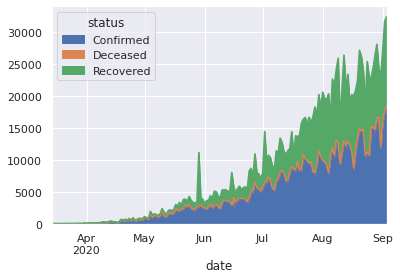

In [191]:
df_.plot.area();

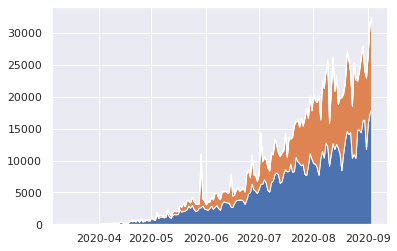

In [192]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

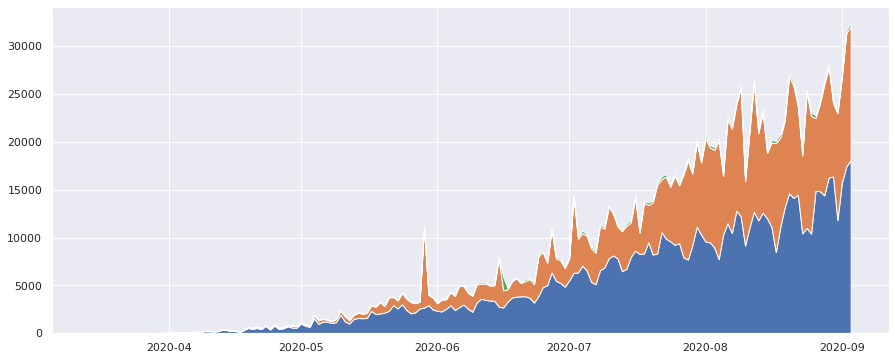

In [193]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

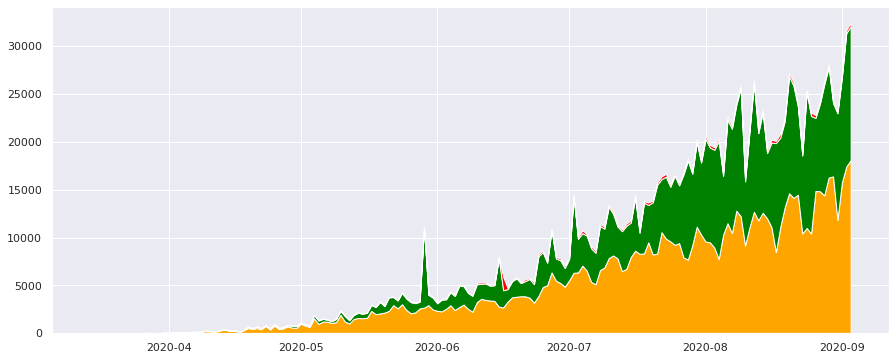

In [194]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors=['orange', 'green', 'red']);

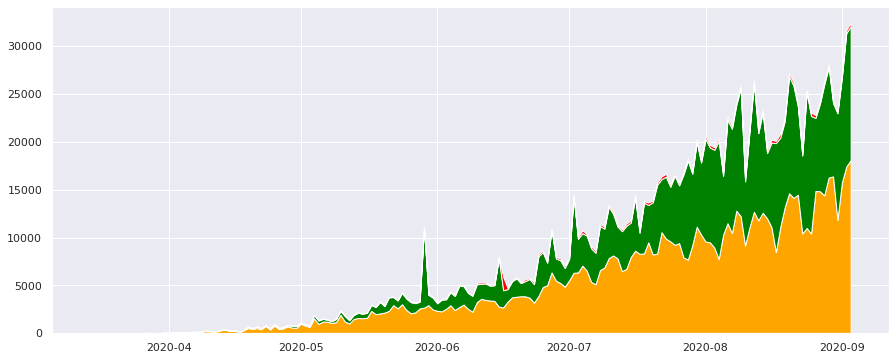

In [195]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);

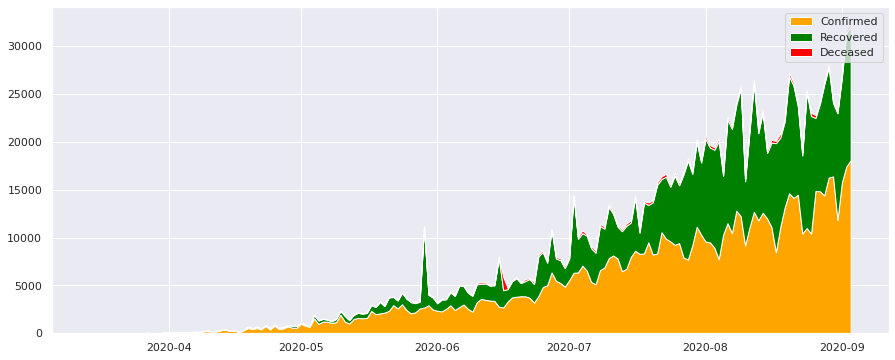

In [196]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

### Relative stacked area plot

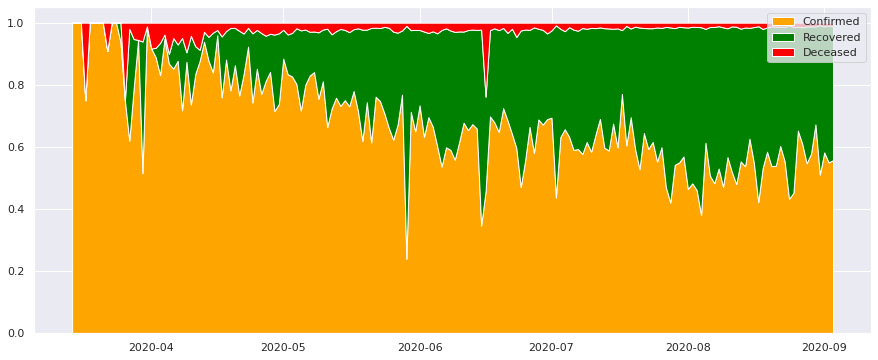

In [197]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

In [198]:
def plot_stacked_area_by_state(state):
    df_ = df[[state, 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
                df_.Recovered/df_.sum(axis=1), 
                df_.Deceased/df_.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


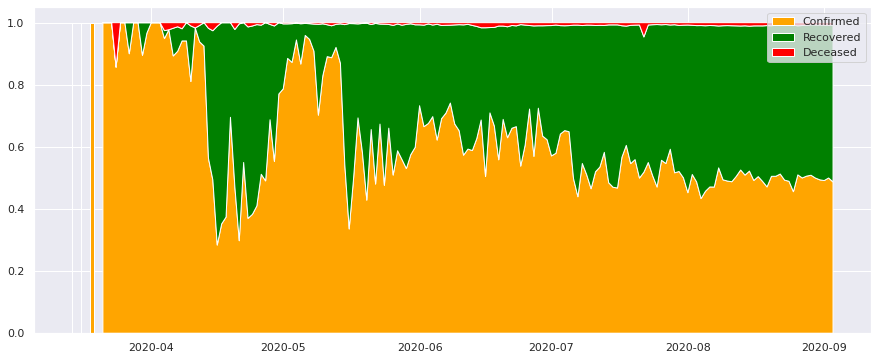

In [199]:
plot_stacked_area_by_state('tn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


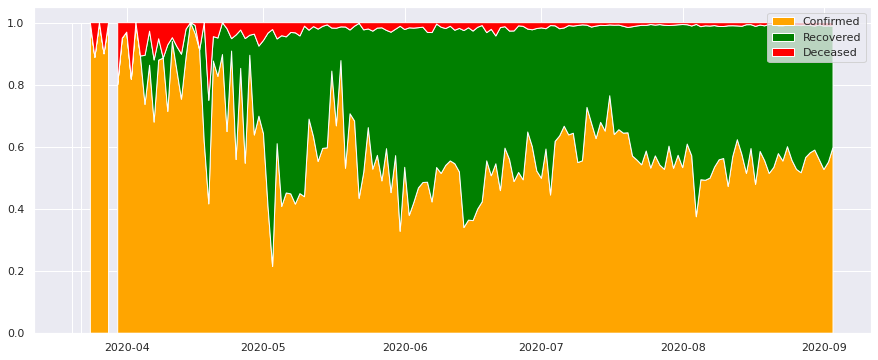

In [200]:
plot_stacked_area_by_state('mp');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


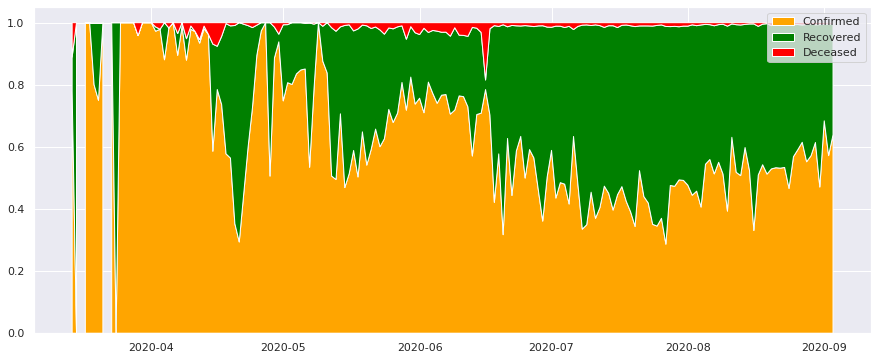

In [201]:
plot_stacked_area_by_state('dl')

# Plotting relationships between data

## Scatter plot

In [202]:
import seaborn as sns
t = sns.load_dataset('tips')

In [203]:
t.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

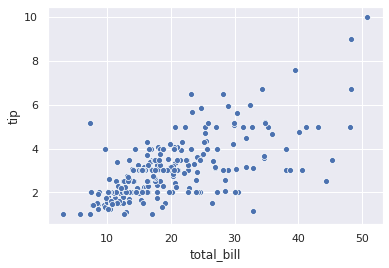

In [204]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [205]:
t['tip_fraction'] = t['tip']/t['total_bill']

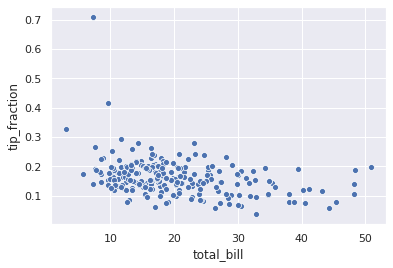

In [206]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t);

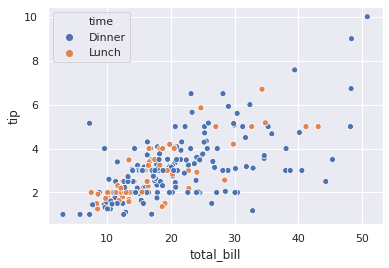

In [207]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time');

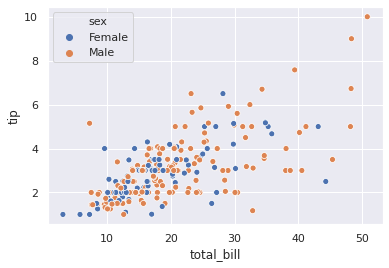

In [208]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='sex');

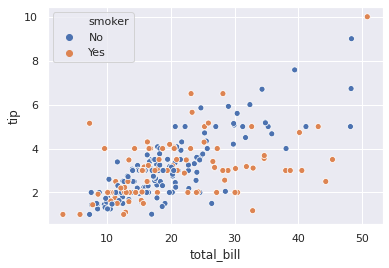

In [209]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='smoker');

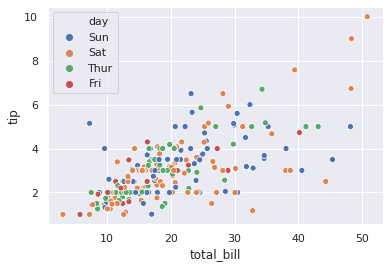

In [210]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='day');

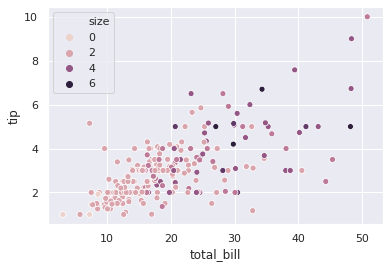

In [211]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='size');

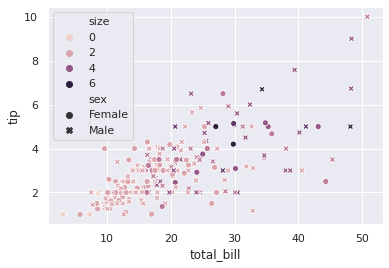

In [212]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='size', style='sex');

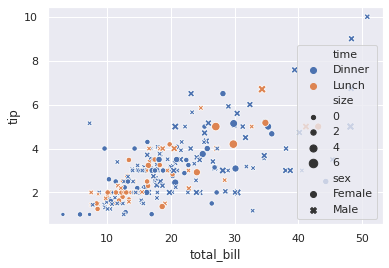

In [213]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time', style='sex', size='size');

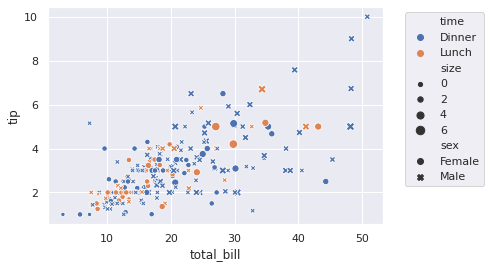

In [214]:
sns.scatterplot(x='total_bill', y='tip', data=t,
                hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05, 1));

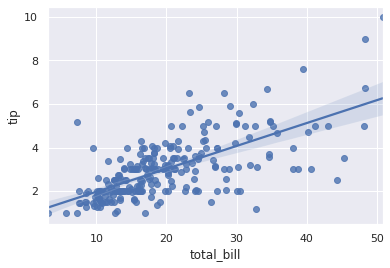

In [215]:
sns.regplot(x='total_bill', y='tip', data=t);

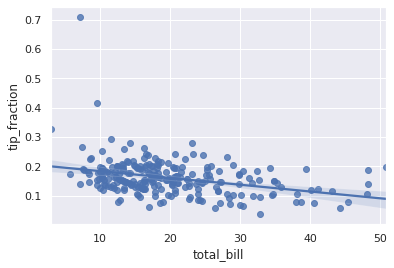

In [216]:
sns.regplot(x='total_bill', y='tip_fraction', data=t);

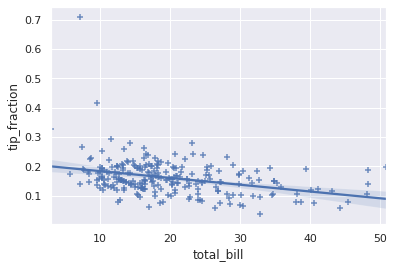

In [217]:
sns.regplot(x='total_bill', y='tip_fraction', data=t, marker="+");

In [218]:
d = sns.load_dataset('diamonds')

In [219]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

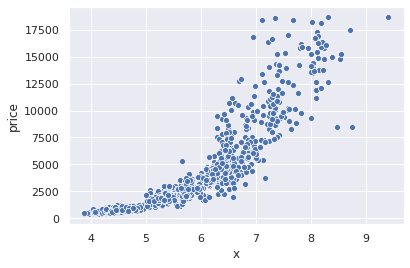

In [220]:
sns.scatterplot('x', 'price', data=d.sample(1000));

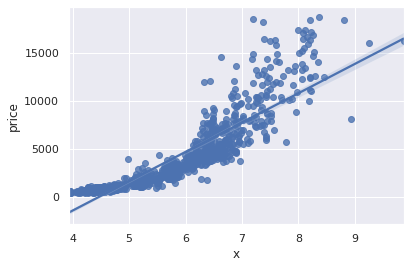

In [221]:
sns.regplot('x', 'price', data=d.sample(1000));

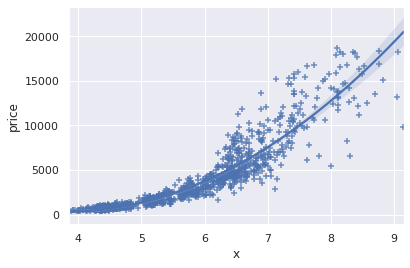

In [222]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker="+");

## Bar plots

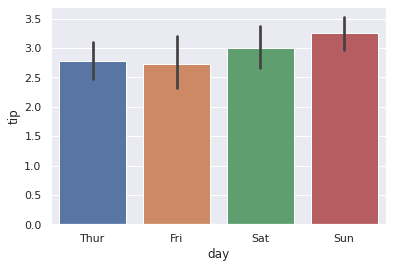

In [223]:
# Height of the bar corresponds to the mean

sns.barplot(x="day", y ="tip", data=t);

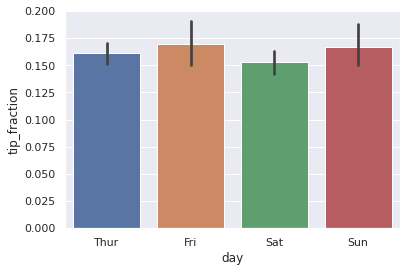

In [224]:
sns.barplot(x="day", y ="tip_fraction", data=t);

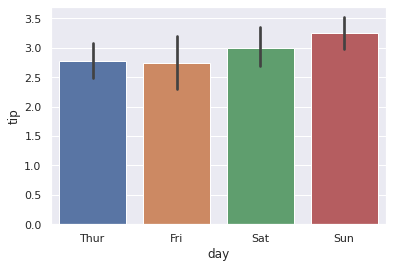

In [225]:
sns.barplot(x="day", y ="tip", data=t);

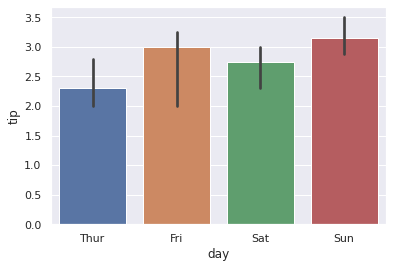

In [226]:
sns.barplot(x="day", y ="tip", data=t, estimator=np.median);

In [227]:
def my_estimate(v):
    return np.quantile(v, 0.25)

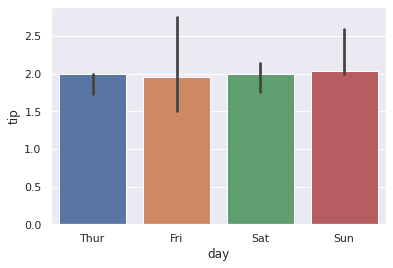

In [228]:
sns.barplot(x="day", y ="tip", data=t, estimator=my_estimate);

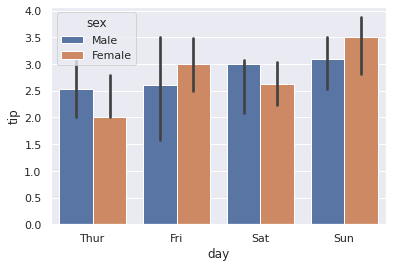

In [229]:
sns.barplot(x="day", y ="tip", hue="sex", data=t, estimator=np.median);

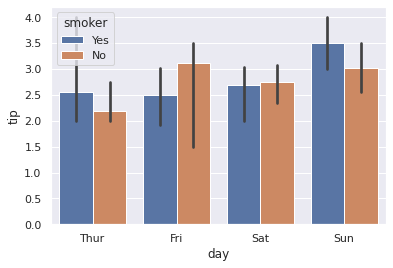

In [230]:
sns.barplot(x="day", y ="tip", hue="smoker", data=t, estimator=np.median);

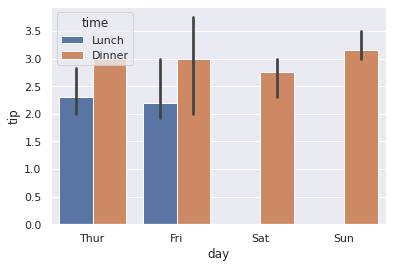

In [231]:
sns.barplot(x="day", y ="tip", hue="time", data=t, estimator=np.median);

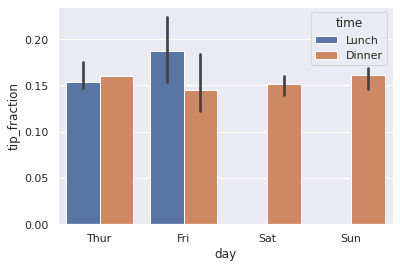

In [232]:
sns.barplot(x="day", y ="tip_fraction", hue="time", data=t, estimator=np.median);

In [233]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

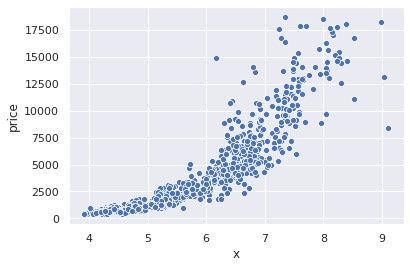

In [234]:
sns.scatterplot('x', 'price', data=d.sample(1000));

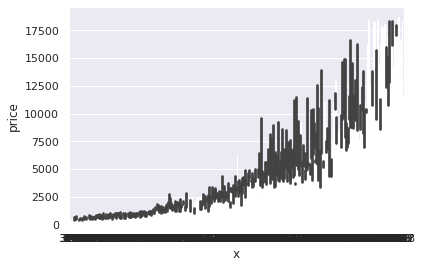

In [235]:
sns.barplot('x', 'price', data=d.sample(1000));

In [236]:
d['x_q'] = pd.cut(d['x'], bins=15);

In [237]:
d.head()

carat      cut color clarity  depth  ...  price     x     y     z             x_q
0   0.23    Ideal     E     SI2   61.5  ...    326  3.95  3.98  2.43   (3.58, 4.296]
1   0.21  Premium     E     SI1   59.8  ...    326  3.89  3.84  2.31   (3.58, 4.296]
2   0.23     Good     E     VS1   56.9  ...    327  4.05  4.07  2.31   (3.58, 4.296]
3   0.29  Premium     I     VS2   62.4  ...    334  4.20  4.23  2.63   (3.58, 4.296]
4   0.31     Good     J     SI2   63.3  ...    335  4.34  4.35  2.75  (4.296, 5.012]

[5 rows x 11 columns]

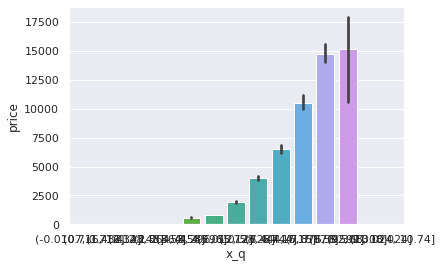

In [238]:
sns.barplot('x_q', 'price', data=d.sample(1000));

In [239]:
d['x_q'] = pd.cut(d['x'], bins=15, labels=False);

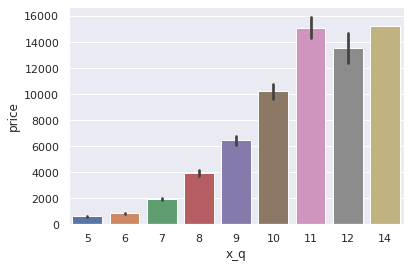

In [240]:
sns.barplot('x_q', 'price', data=d.sample(1000));

## Line plot

In [241]:
f = sns.load_dataset('fmri')

In [242]:
f.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

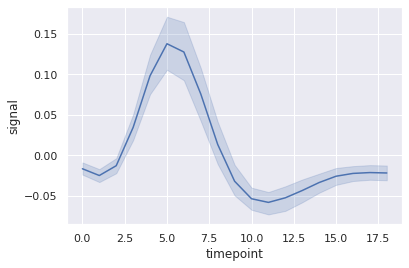

In [243]:
sns.lineplot('timepoint', 'signal', data=f);

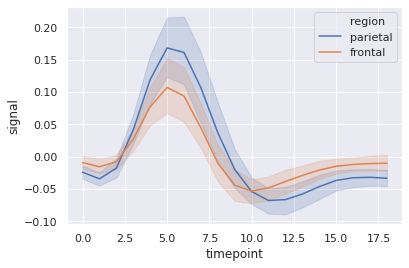

In [244]:
sns.lineplot('timepoint', 'signal', data=f, hue="region");

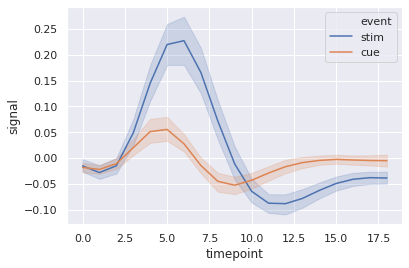

In [245]:
sns.lineplot('timepoint', 'signal', data=f, hue="event");

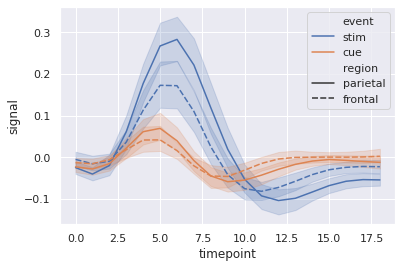

In [246]:
sns.lineplot('timepoint', 'signal', data=f, hue="event", style="region");

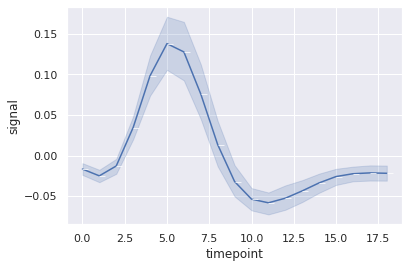

In [247]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

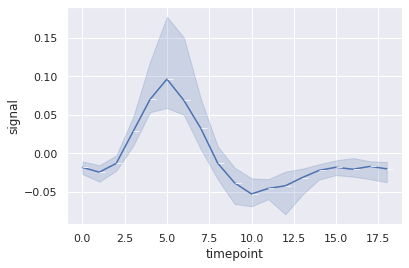

In [248]:
sns.lineplot('timepoint', 'signal', data=f, marker=True, estimator=np.median);

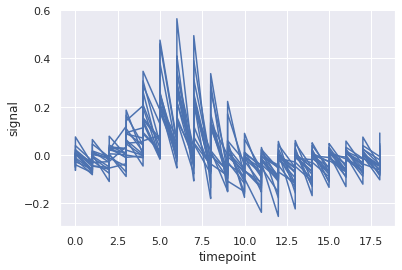

In [249]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [250]:
f_ = f[(f.region == "parietal") & (f.event == "cue")]

In [251]:
f_.head()

subject  timepoint event    region    signal
532      s3          4   cue  parietal  0.058219
533      s6          5   cue  parietal  0.038145
534      s7          5   cue  parietal -0.008158
535      s8          5   cue  parietal  0.047136
536      s9          5   cue  parietal  0.055847

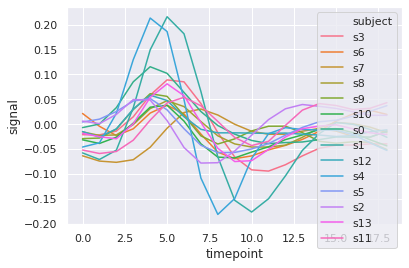

In [252]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);

In [253]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])

In [254]:
y = x * x

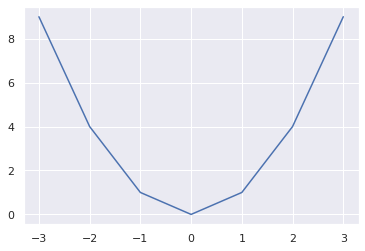

In [255]:
sns.lineplot(x, y);

In [256]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date']) 
df.drop('tt', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [257]:
df.head()

date  an  ap  ar  as  br  ch  ct  ...  sk  tg  tn  tr  un  up  ut  wb
0 2020-03-14 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
1 2020-03-15 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
2 2020-03-16 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
3 2020-03-17 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
4 2020-03-18 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN

[5 rows x 39 columns]

date | state | confirmed

2020-03-14 | an | 0

2020-03-14 | ap | 1

In [258]:
df_ = pd.melt(df, id_vars="date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [259]:
df_.head()

date state  confirmed
0 2020-03-14    an        NaN
1 2020-03-15    an        NaN
2 2020-03-16    an        NaN
3 2020-03-17    an        NaN
4 2020-03-18    an        NaN

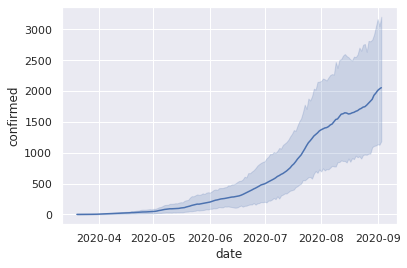

In [260]:
sns.lineplot('date', 'confirmed', data=df_);

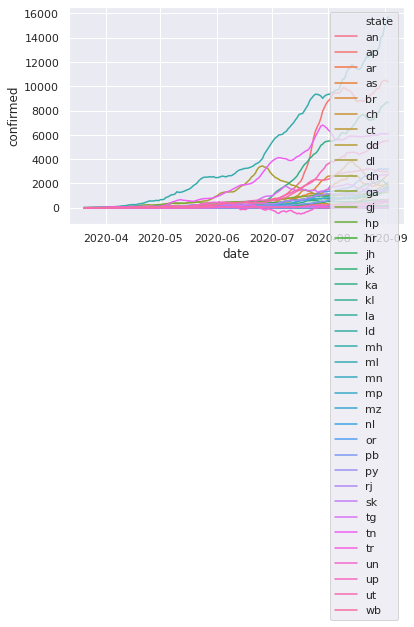

In [261]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

In [262]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']

In [263]:
df_ = df_[df_.state.isin(states)]

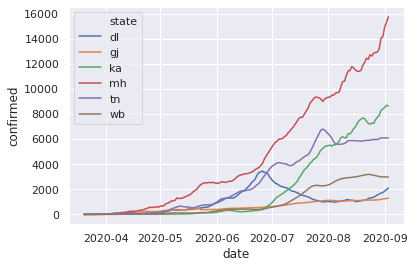

In [264]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

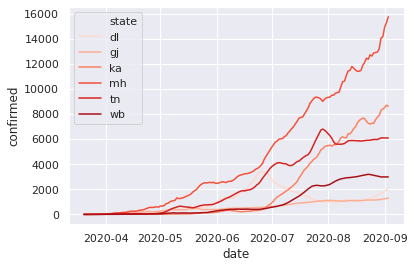

In [265]:
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

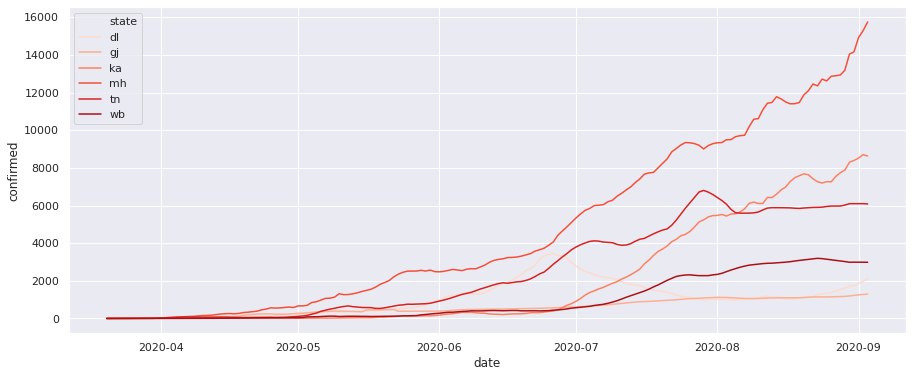

In [266]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

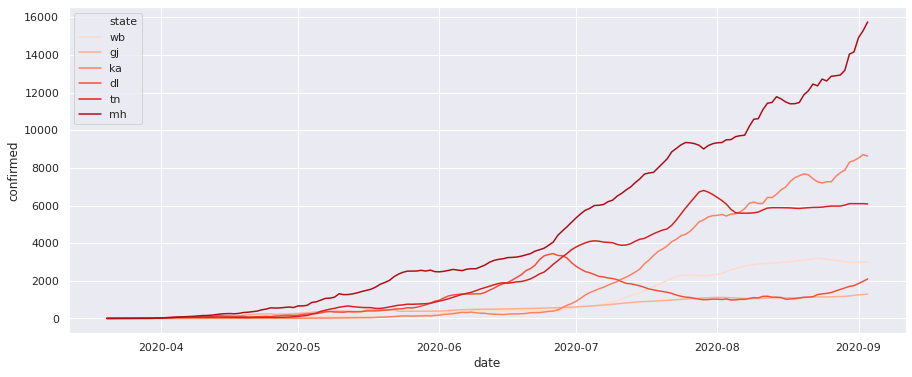

In [267]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);

## Heatmap

X [10 x 10]

X(i, j) -> value

In [268]:
x = np.random.rand(10, 10)

In [269]:
x

array([[0.59437078, 0.47690736, 0.24785733, 0.87233903, 0.2430929 ,
        0.83368551, 0.28365027, 0.74864532, 0.1401888 , 0.99946664],
       [0.52072205, 0.96874659, 0.76393611, 0.58186737, 0.36028344,
        0.58230952, 0.82120955, 0.73905299, 0.0449958 , 0.63051068],
       [0.48954244, 0.01442166, 0.40895539, 0.67883258, 0.75399917,
        0.5470327 , 0.95158587, 0.85133966, 0.00200399, 0.89668108],
       [0.51977555, 0.57986985, 0.64678083, 0.61507344, 0.21751447,
        0.65119748, 0.2311185 , 0.29596079, 0.10580696, 0.45502565],
       [0.99776759, 0.2337778 , 0.69638794, 0.2601489 , 0.59675681,
        0.29029985, 0.56353021, 0.97760828, 0.94926929, 0.69605756],
       [0.62796625, 0.08208341, 0.03647363, 0.58849051, 0.49980683,
        0.51916597, 0.10687927, 0.68835398, 0.97426046, 0.12501873],
       [0.27127256, 0.36149799, 0.75520658, 0.39968322, 0.7133783 ,
        0.62580821, 0.42921746, 0.97511812, 0.60019937, 0.0292239 ],
       [0.43133042, 0.43424155, 0.5905089

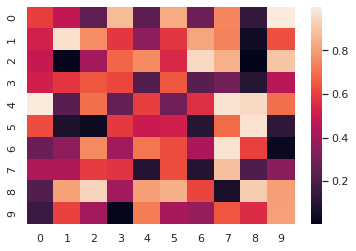

In [270]:
sns.heatmap(x)

In [271]:
fl = sns.load_dataset('flights')

In [273]:
fl.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [274]:
fl.sample(10)

year      month  passengers
137  1960       June         535
125  1959       June         472
5    1949       June         135
78   1955       July         364
40   1952        May         183
68   1954  September         259
41   1952       June         218
9    1949    October         119
36   1952    January         171
79   1955     August         347

 	year 	month 	passengers

0 	1949 	January 	112

1 	1949 	February 	118

2 	1949 	March 	132



year    January February March

1949     112     118      132 

1950

1951




In [275]:
fl_ = fl.pivot(index='year', columns='month', values='passengers');

In [276]:
fl_.head()

month  January  February  March  April  ...  September  October  November  December
year                                    ...                                        
1949       112       118    132    129  ...        136      119       104       118
1950       115       126    141    135  ...        158      133       114       140
1951       145       150    178    163  ...        184      162       146       166
1952       171       180    193    181  ...        209      191       172       194
1953       196       196    236    235  ...        237      211       180       201

[5 rows x 12 columns]

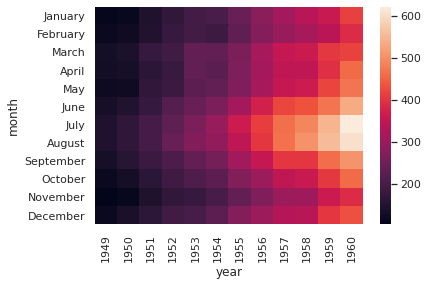

In [277]:
sns.heatmap(fl_.T)

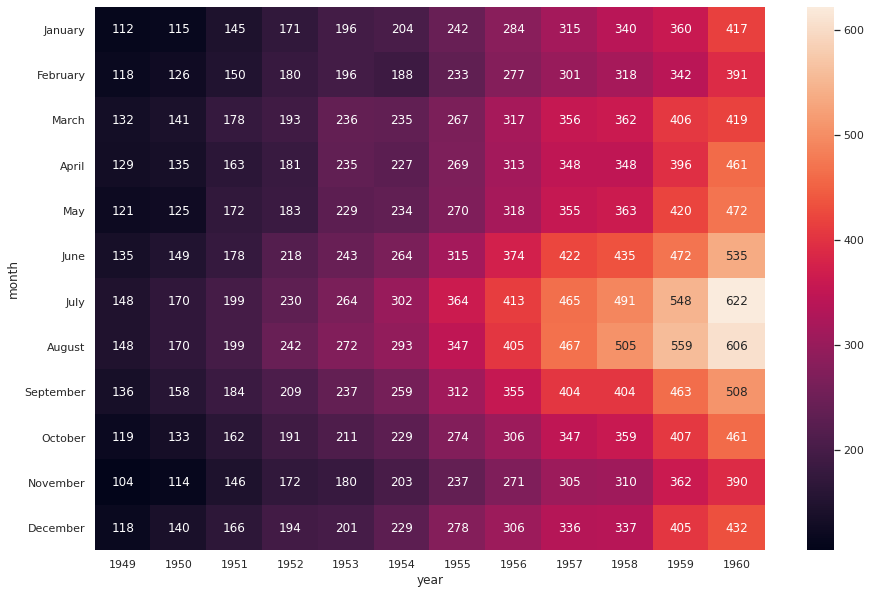

In [278]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d");

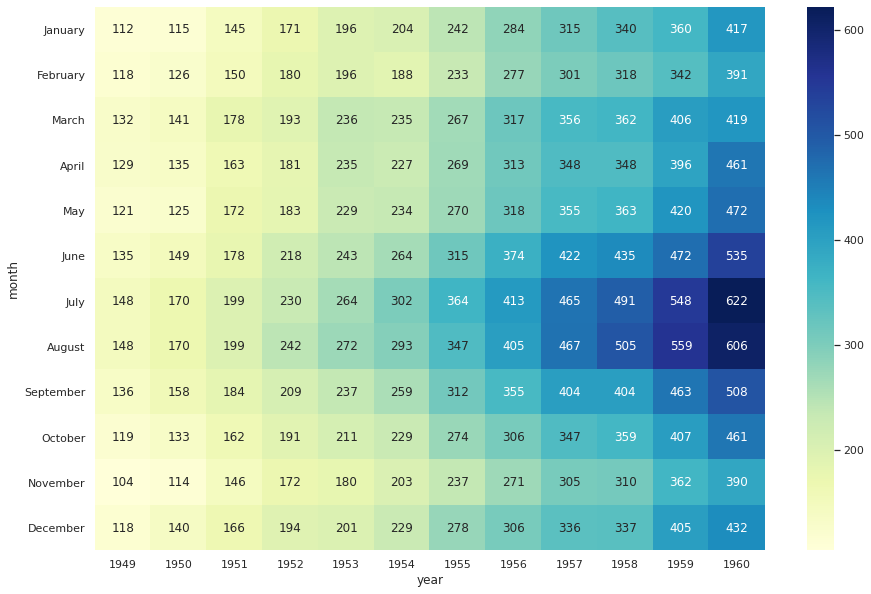

In [279]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", cmap="YlGnBu");

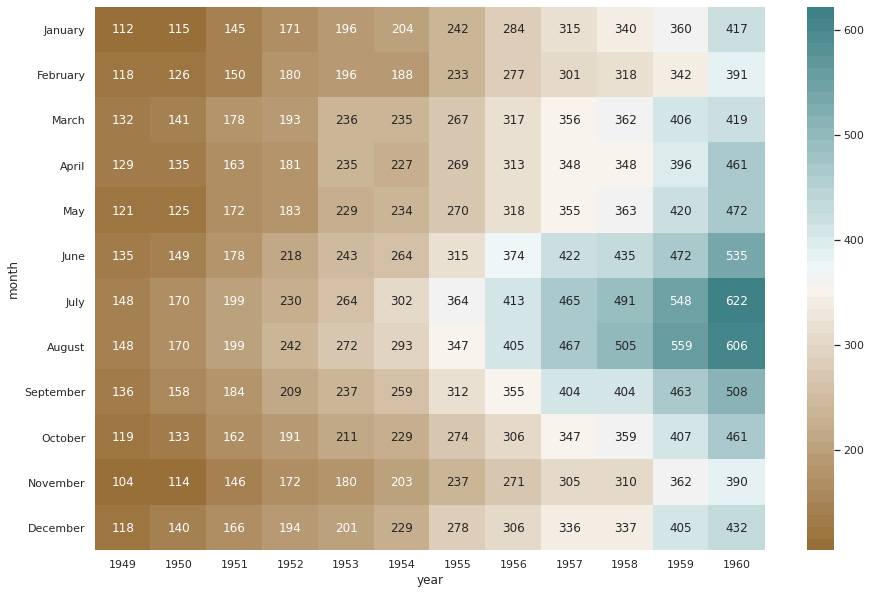

In [280]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=45));

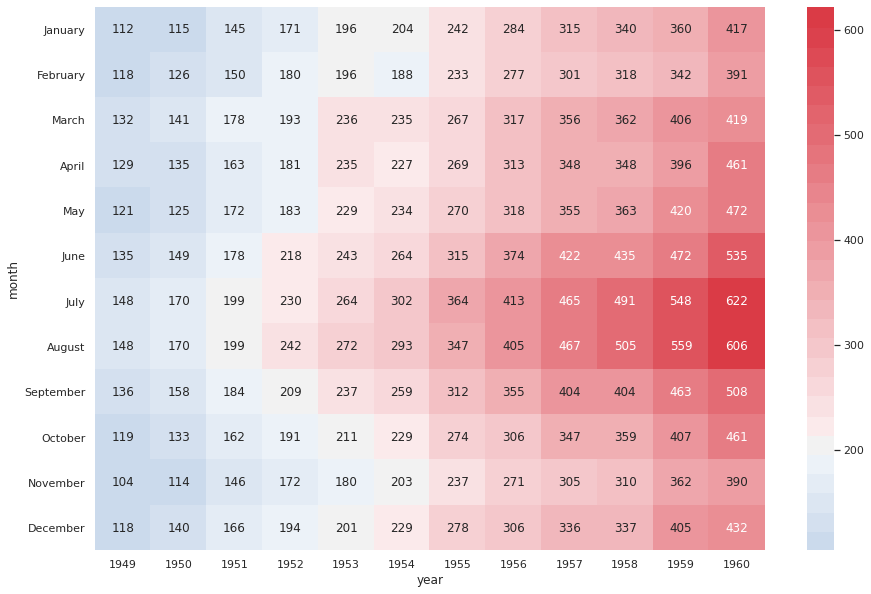

In [281]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(250, 10, n=45),
            center=fl_.loc[1954, 'January']);